In [1]:
%run ../../__init__.py
%load_ext autoreload
%autoreload 2

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
test_dir = "/home/konstantin/personal/Summertime/runs/test/imcpt/"
evaluation_task = eva_ns.REL_POSE

In [3]:
methods = {
    'shi_disk': {eva_ns.COLOR: 'lightskyblue',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'Shi-Tomasi+DISK'},
    
    'sift_disk': {eva_ns.COLOR: 'orange',
                  eva_ns.LINE_STYLE: '-',
                  eva_ns.ALIAS: 'SIFT+DISK'},
    
    'superpoint_disk': {eva_ns.COLOR: 'gold',
                        eva_ns.LINE_STYLE: '-',
                        eva_ns.ALIAS: 'SuperPoint+DISK'},
    
    'r2d2_disk': {eva_ns.COLOR: 'blue',
                  eva_ns.LINE_STYLE: '-',
                  eva_ns.ALIAS: 'R2D2+DISK'},
    
    'keynet_disk': {eva_ns.COLOR: 'red',
                    eva_ns.LINE_STYLE: '-',
                    eva_ns.ALIAS: 'KeyNet+DISK'},
    
    'disk': {eva_ns.COLOR: 'purple',
             eva_ns.LINE_STYLE: '-',
             eva_ns.ALIAS: 'DISK'},
    
    'rekd_disk': {eva_ns.COLOR: 'hotpink',
                  eva_ns.LINE_STYLE: '-',
                  eva_ns.ALIAS: 'REKD+DISK'},
    
    'shiness_disk': {eva_ns.COLOR: 'cyan',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-ST+DISK'},
}

In [4]:
methods_disk_f_pydegensac = {
    eva_ns.BACKEND: 'f_pydegensac/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'PyDEGENSAC, DISK',
        eva_ns.SAVE_DIR: 'figures/test',        
        eva_ns.SAVE_NAME: 'disk.pdf',
        
        eva_ns.NUM_INL: {
            eva_ns.SAVE_DIR: 'figures/test/num_inl',
            eva_ns.SAVE_NAME: 'disk.pdf',
            
            eva_ns.FONT_SIZE: 10
        },
        
        eva_ns.CAT_ABL: {
            eva_ns.SAVE_DIR: 'figures/test/cat_abl',
            eva_ns.SAVE_NAME: 'disk.pdf',
            
            eva_ns.FONT_SIZE: 3.5,
            eva_ns.LEGEND_LOC: ['lower left', 'lower right']
        }
    }
}

In [5]:
from source.evaluation.vis import prepare_methods_list

save = False
# save = True

select = None

methods_list = prepare_methods_list([methods_disk_f_pydegensac], select)

In [6]:
from source.evaluation.rel_pose.logging import load_rel_pose_eval

r_acc_list, t_acc_list, num_inl_list = load_rel_pose_eval(test_dir, evaluation_task, methods_list)

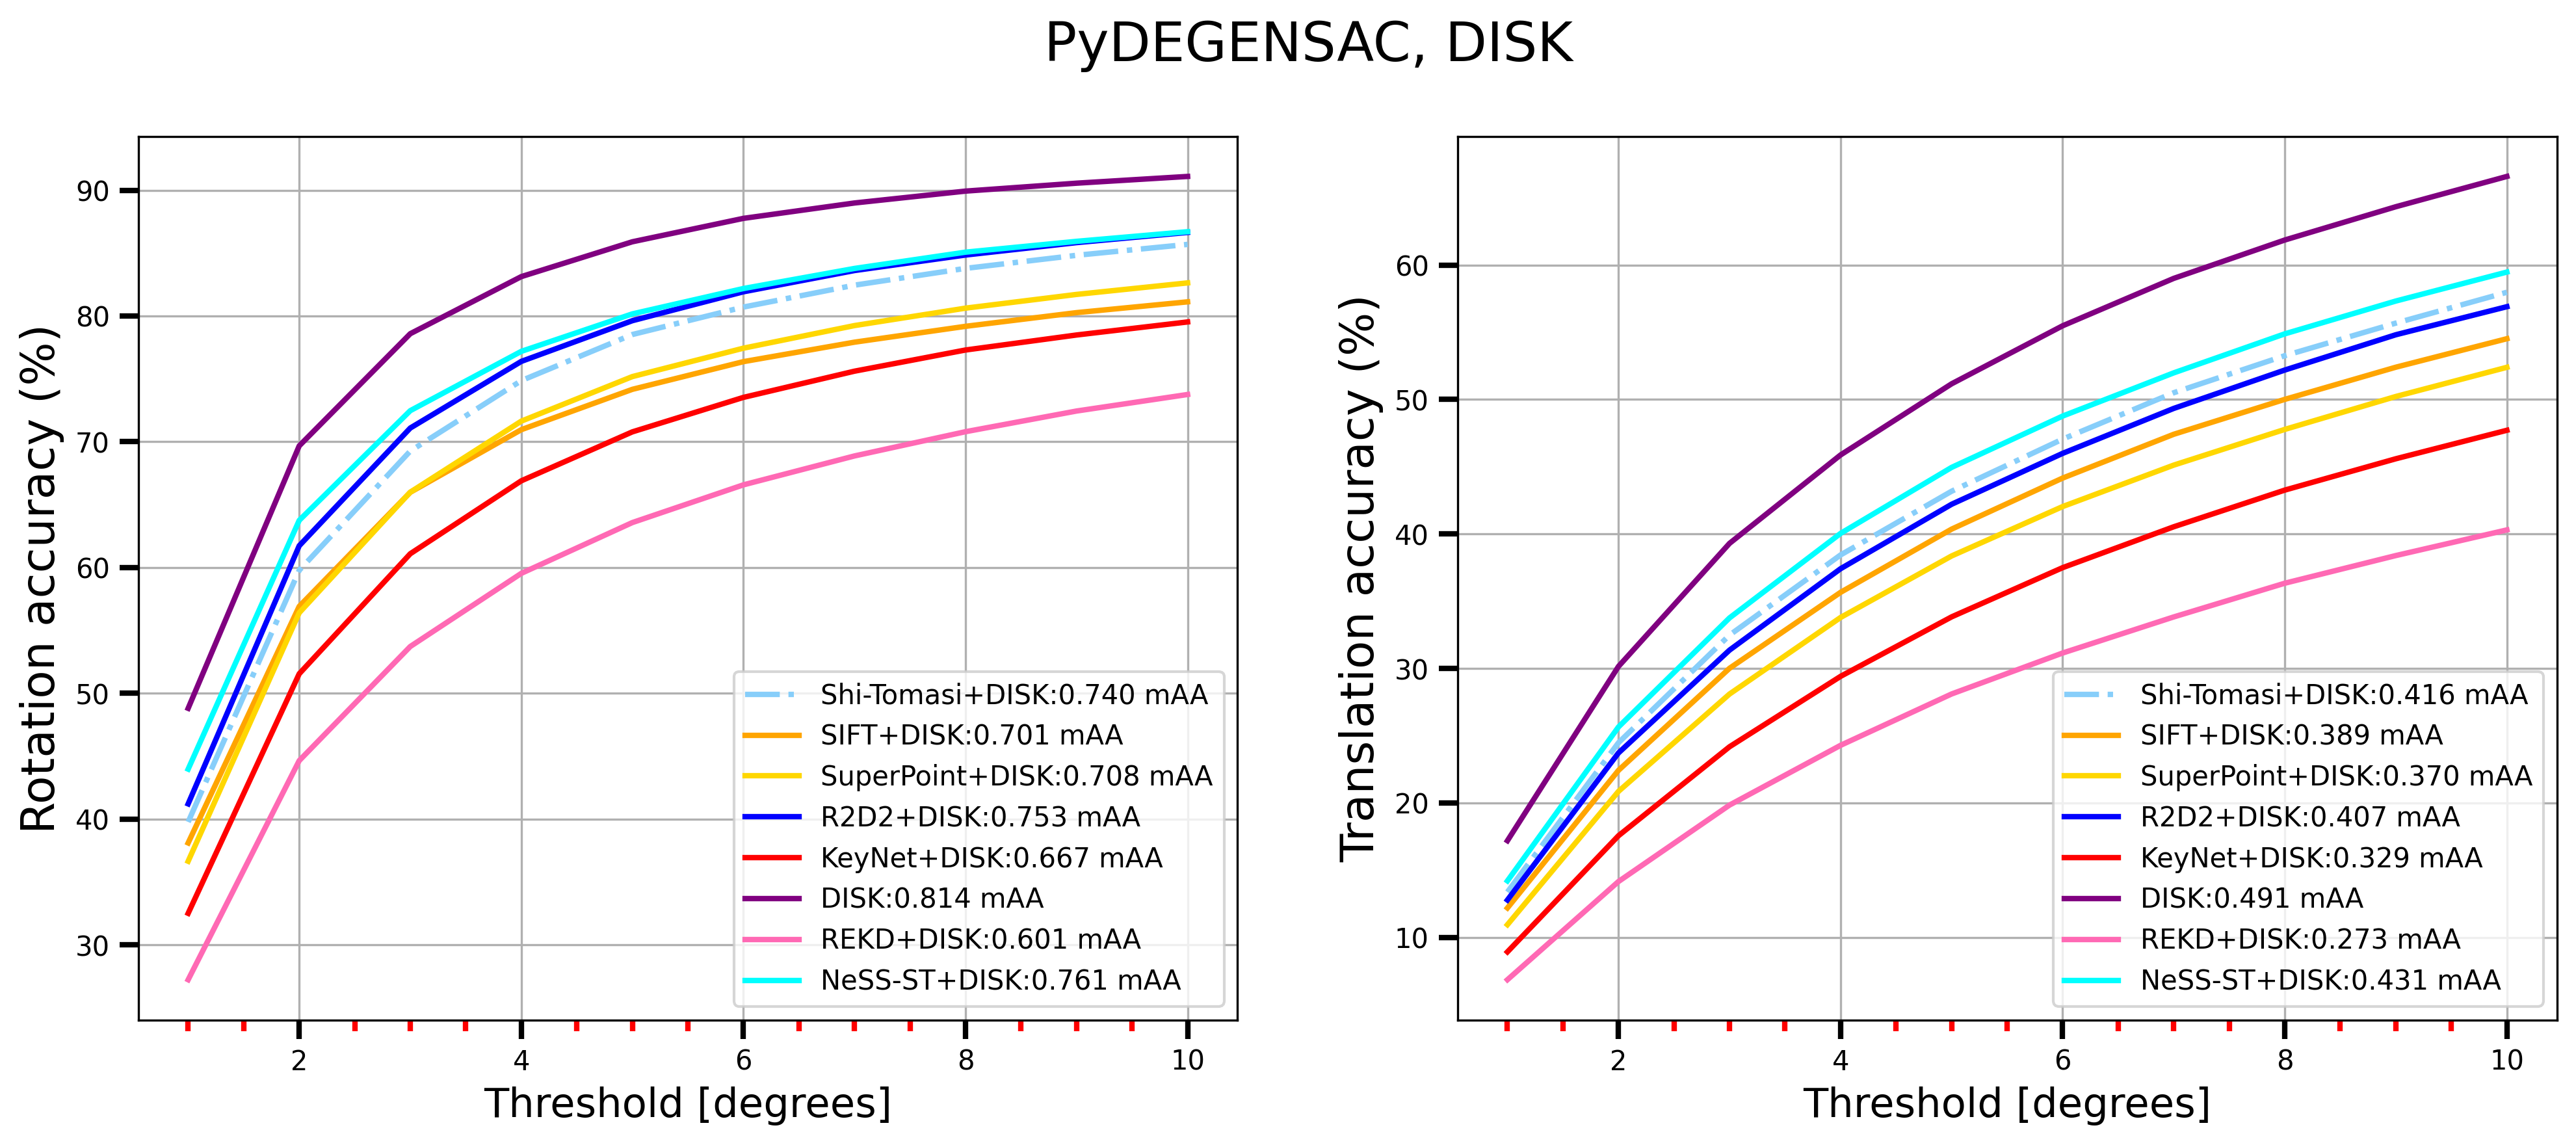

In [7]:
from source.evaluation.rel_pose.vis import RelPoseAccuracyPlotter

vis_indices = None

RelPoseAccuracyPlotter(methods_list,
                       r_acc_list, t_acc_list,
                       vis_indices).plot_all(save)

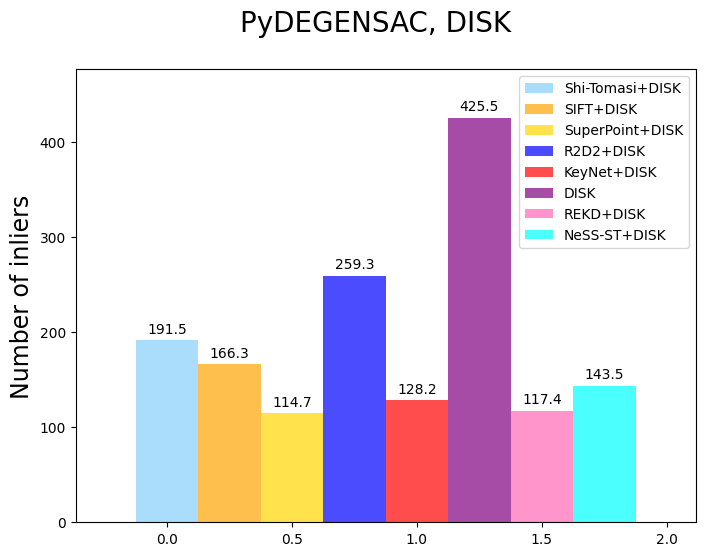

In [8]:
from source.evaluation.rel_pose.vis import RelPoseNumInlPlotter

RelPoseNumInlPlotter(methods_list,
                     num_inl_list,
                     vis_indices).plot_all(save)

In [9]:
test_cats = [['british_museum'], ['florence_cathedral_side'], ['lincoln_memorial_statue'],
             ['milan_cathedral'], ['mount_rushmore'], 
             ['piazza_san_marco'], ['sagrada_familia'], ['st_pauls_cathedral']]
cat_names = ['British Museum', 'Florence Cathedral Side', 'Lincoln Memorial Statue',
             'Milan Cathedral', 'Mount Rushmore', 'Piazza San Marco', 'Sagrada Familia', 'St. Pauls Cathedral']

In [10]:
from source.evaluation.rel_pose.logging import load_cat_rel_pose_eval

r_mAA_list, t_mAA_list = load_cat_rel_pose_eval(test_dir, evaluation_task, methods_list, test_cats)

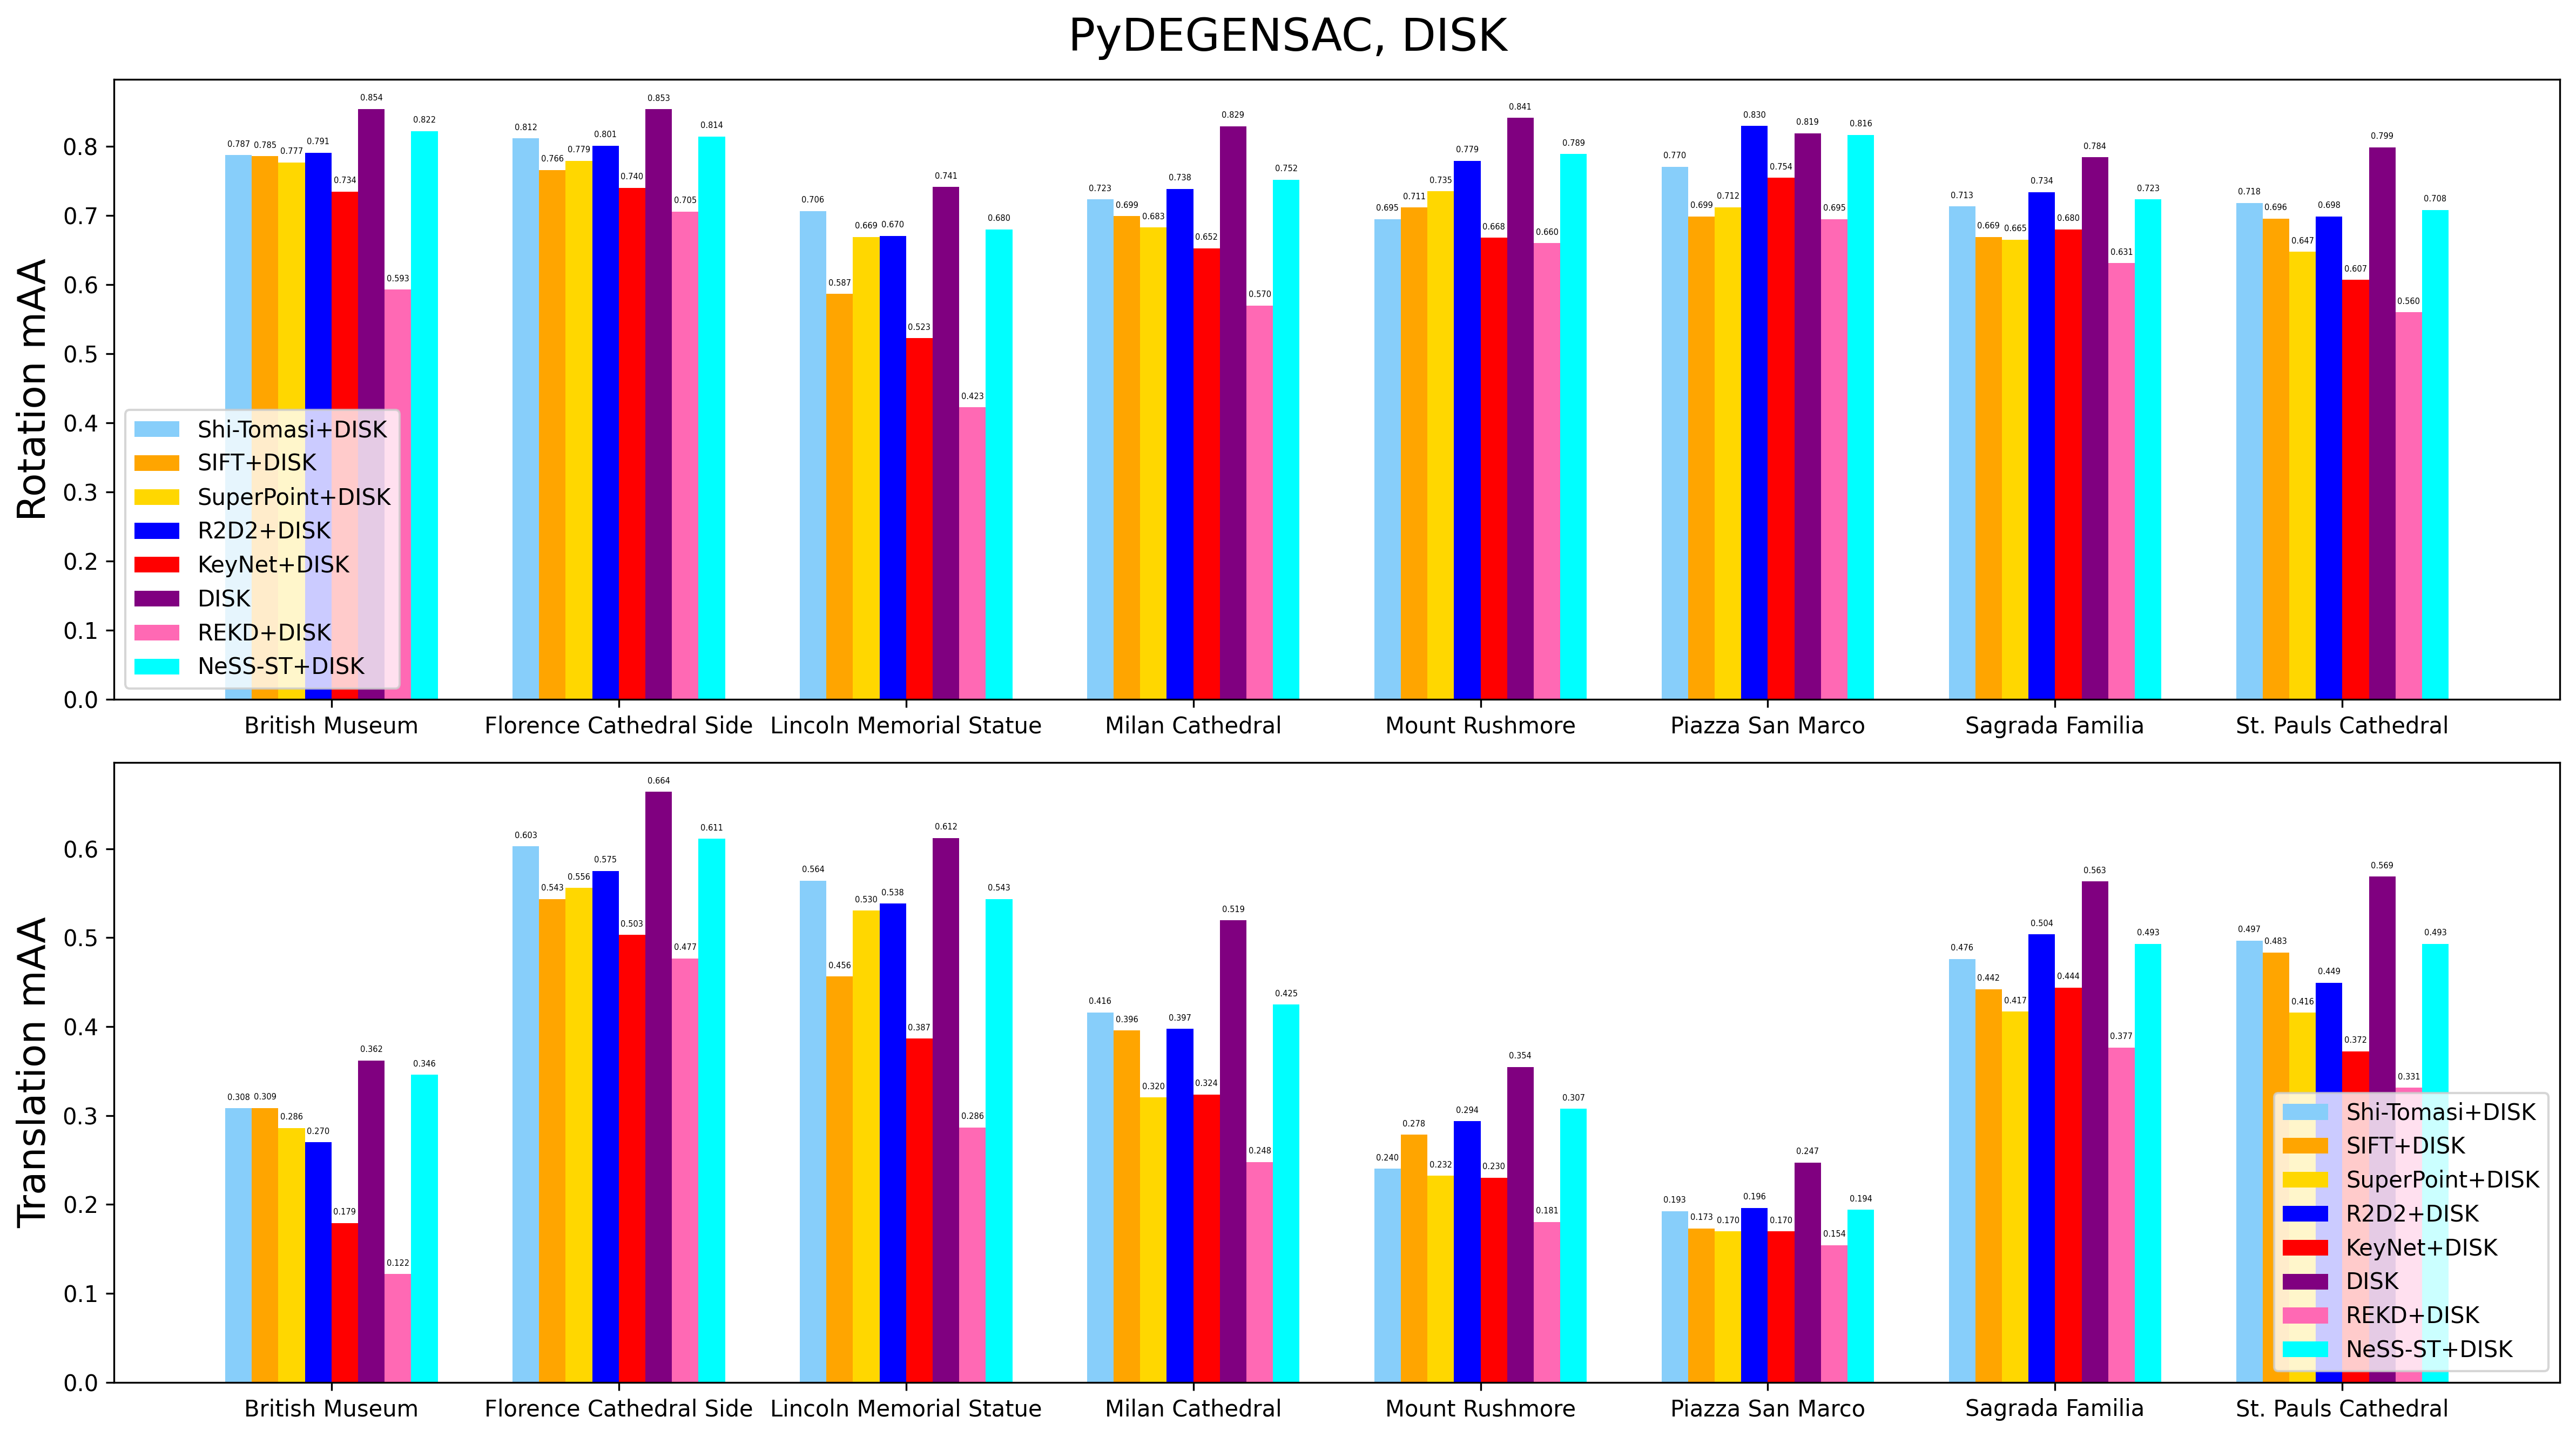

In [11]:
from source.evaluation.rel_pose.vis import CatRelPosemAAPlotter

CatRelPosemAAPlotter(methods_list, cat_names,
                     r_mAA_list, t_mAA_list,
                     vis_indices).plot_all(save)

# Ablations

In [12]:
ablation_methods_setup = {
    eva_ns.BACKEND: 'f_pydegensac/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.PLOT_PARAMS: {        
        eva_ns.R_T_MAA: {
            eva_ns.SAVE_DIR: 'figures/test/{}_ablation',
            eva_ns.SAVE_NAME: '{}.pdf',
            
            eva_ns.FONT_SIZE: 10,
            eva_ns.LEGEND_LOC: ['lower left', 'lower left']
        },
        
        eva_ns.NUM_INL: {
            eva_ns.TITLE_FONT_SIZE: 16,
            eva_ns.SAVE_DIR: 'figures/test/{}_ablation/num_inl',
            eva_ns.SAVE_NAME: '{}.pdf',
            
            eva_ns.FONT_SIZE: 10,
            eva_ns.LEGEND_LOC: 'lower left'
        }
    }
}

## Base detector ablation

In [13]:
base_detector_methods = {
    'shi_disk': {eva_ns.COLOR: 'lightskyblue',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'Shi-Tomasi+DISK'},
    
    'harris_disk': {eva_ns.COLOR: 'silver',  
                    eva_ns.LINE_STYLE: '-.',
                    eva_ns.ALIAS: 'Harris+DISK'},
    
    'doh_disk': {eva_ns.COLOR: 'darkorange',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'DoH+DISK'},
    
    'log_disk': {eva_ns.COLOR: 'maroon',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'LoG+DISK'},
    
    'shiness_disk': {eva_ns.COLOR: 'cyan',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-ST+DISK'},
    
    'dohness_disk': {eva_ns.COLOR: 'peru',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-DoH+DISK'},
    
    'logness_disk': {eva_ns.COLOR: 'indianred',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-LoG+DISK'},
}

In [14]:
base_detector_methods_disk_f_pydegensac = {
    eva_ns.BACKEND: 'f_pydegensac/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: base_detector_methods,
    
     eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'Base detector ablation. PyDEGENSAC, DISK',
        eva_ns.SAVE_DIR: 'figures/test/base_detector',        
        eva_ns.SAVE_NAME: 'disk.pdf',
        
        eva_ns.NUM_INL: {
            eva_ns.TITLE_FONT_SIZE: 16,
            eva_ns.SAVE_DIR: 'figures/test/base_detector/num_inl',
            eva_ns.SAVE_NAME: 'disk.pdf',
            
            eva_ns.FONT_SIZE: 10,
            eva_ns.LEGEND_LOC: 'lower right'
        },
    }
}

In [15]:
from source.evaluation.vis import prepare_methods_list

save = False
# save = True

select = None

methods_list = prepare_methods_list([base_detector_methods_disk_f_pydegensac], select)

In [16]:
from source.evaluation.rel_pose.logging import load_rel_pose_eval

r_acc_list, t_acc_list, num_inl_list = load_rel_pose_eval(test_dir, evaluation_task, methods_list)

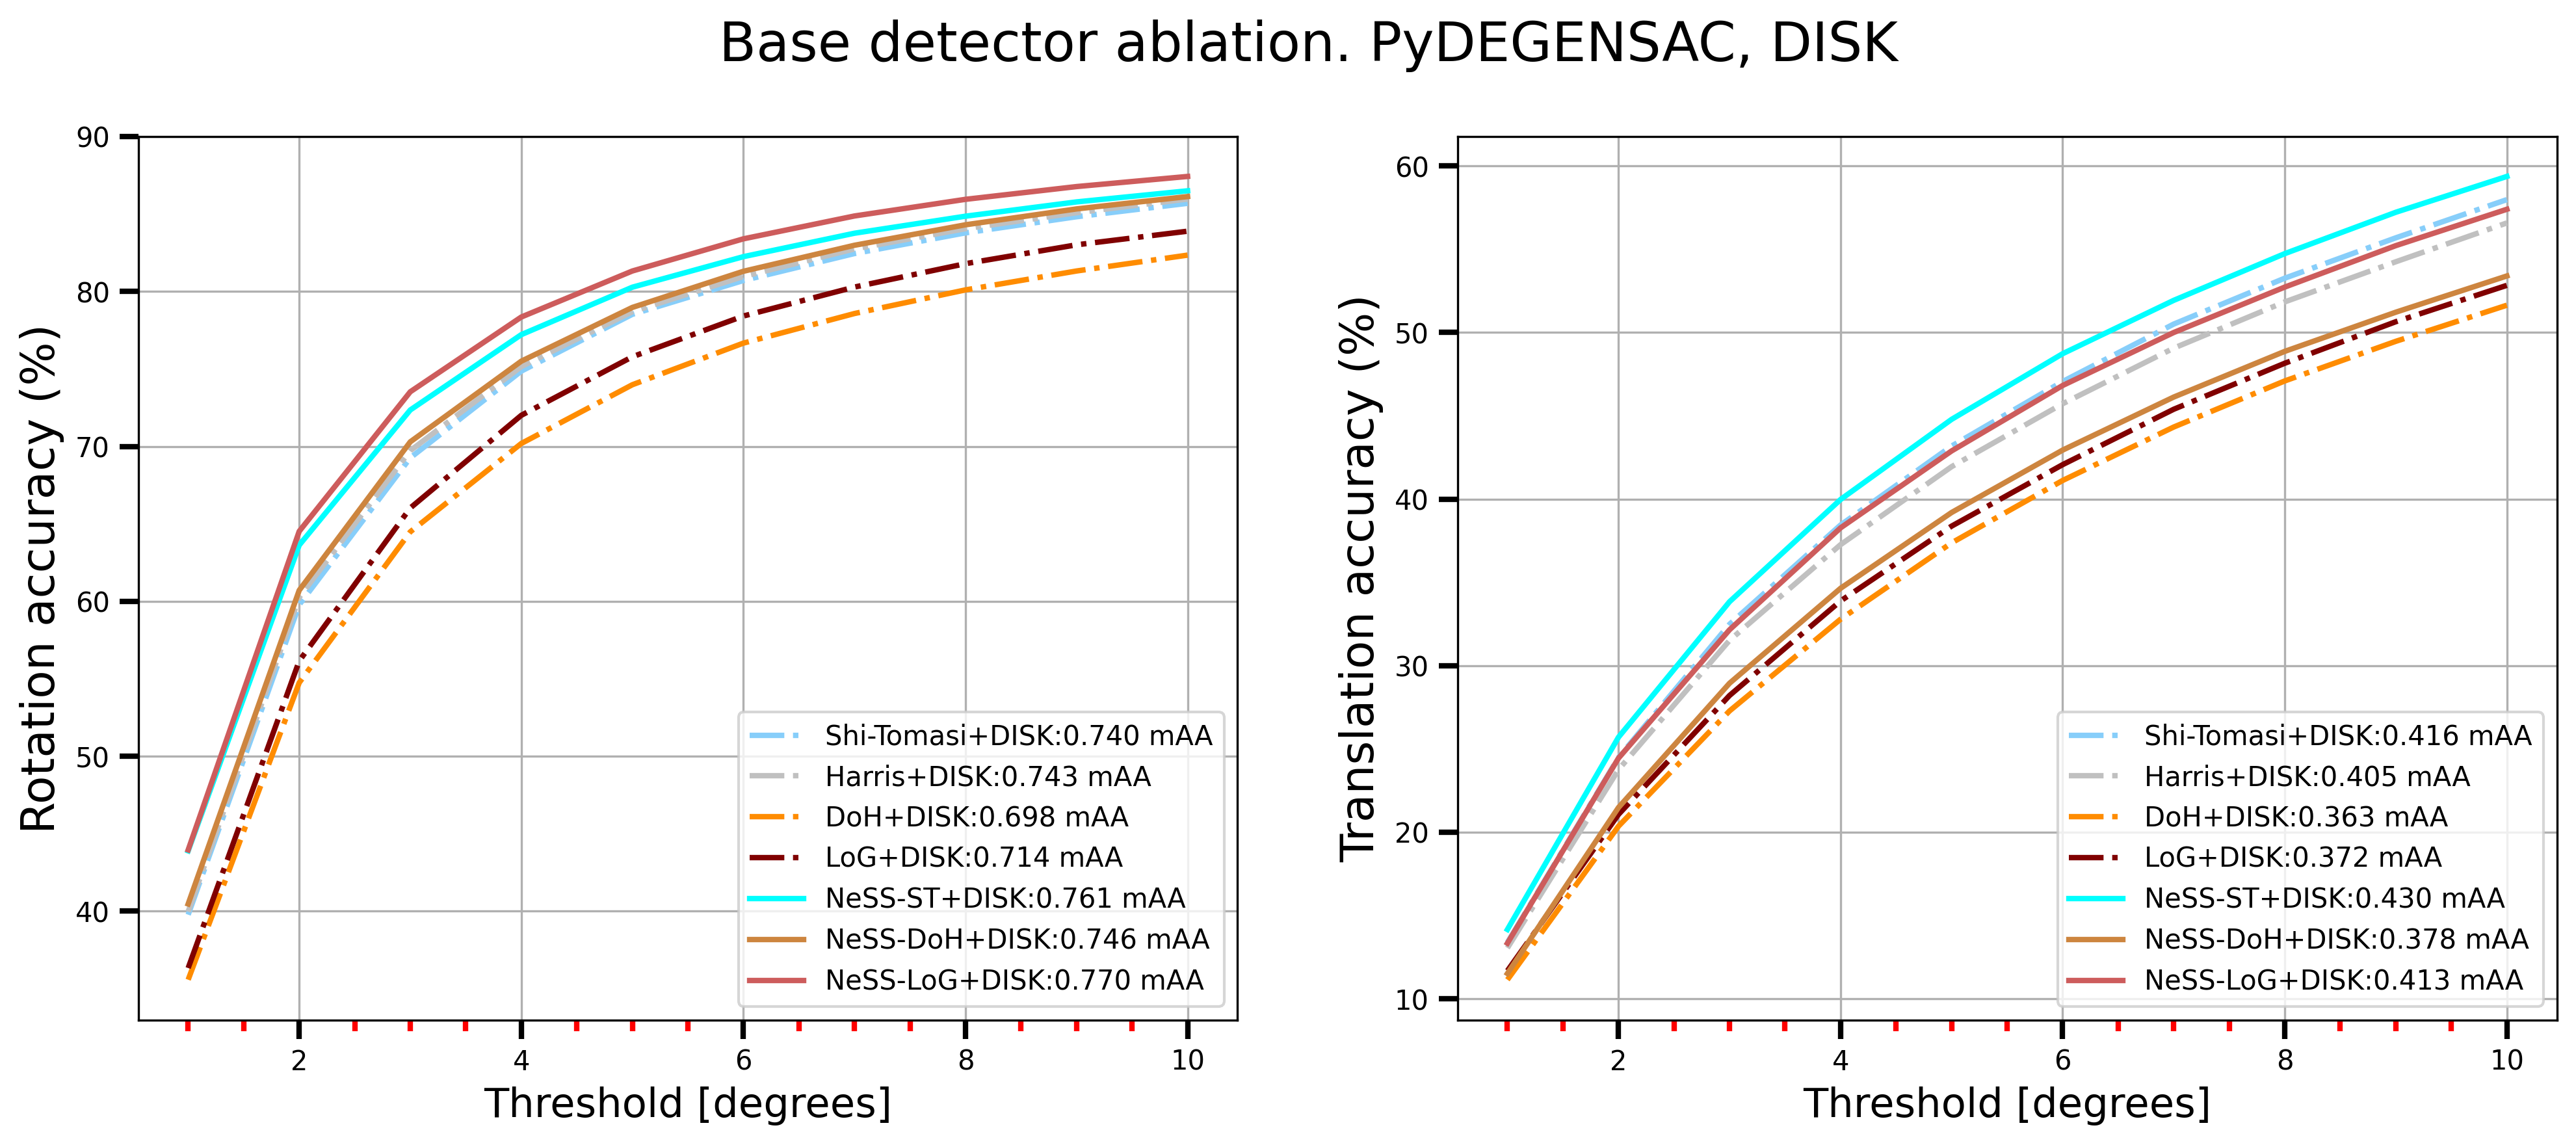

In [17]:
from source.evaluation.rel_pose.vis import RelPoseAccuracyPlotter

vis_indices = None

RelPoseAccuracyPlotter(methods_list,
                       r_acc_list, t_acc_list,
                       vis_indices).plot_all(save)

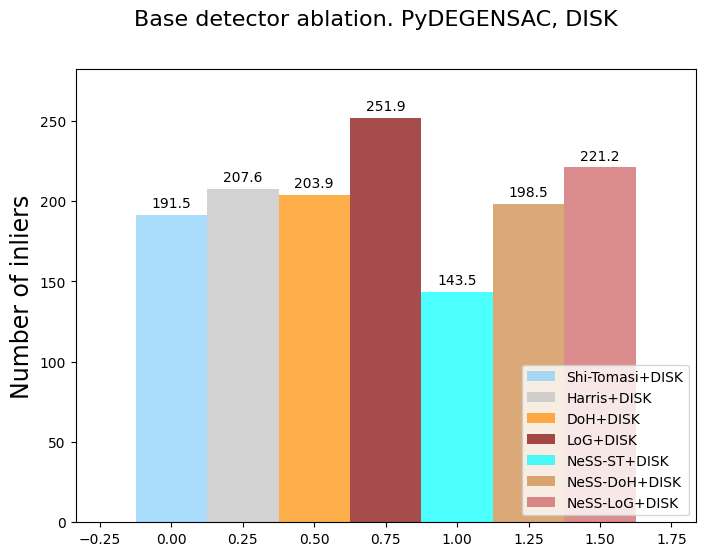

In [18]:
from source.evaluation.rel_pose.vis import RelPoseNumInlPlotter

RelPoseNumInlPlotter(methods_list,
                     num_inl_list,
                     vis_indices).plot_all(save)

### Filtering ablation for NeSS models during training

In [19]:
from source.evaluation.vis import prepare_ablation_methods_list

ablation = 'filtering'
ablation_title = 'NeSS filtering ablation. PyDEGENSAC, DISK'

ness_ablation_methods = {
    'logness_disk': {eva_ns.COLOR: 'maroon',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-LoG+DISK'},
    
    'dohness_disk': {eva_ns.COLOR: 'darkorange',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-DoH+DISK'},
    
    'shiness_disk': {eva_ns.COLOR: 'cyan',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-ST+DISK'}
}

methods_list = prepare_ablation_methods_list(ness_ablation_methods, ablation_methods_setup,
                                             test_dir, evaluation_task, ablation,
                                             ablation_title)

In [20]:
from source.evaluation.rel_pose.logging import load_rel_pose_eval

r_acc_list, t_acc_list, num_inl_list = load_rel_pose_eval(test_dir, evaluation_task, 
                                                          methods_list)

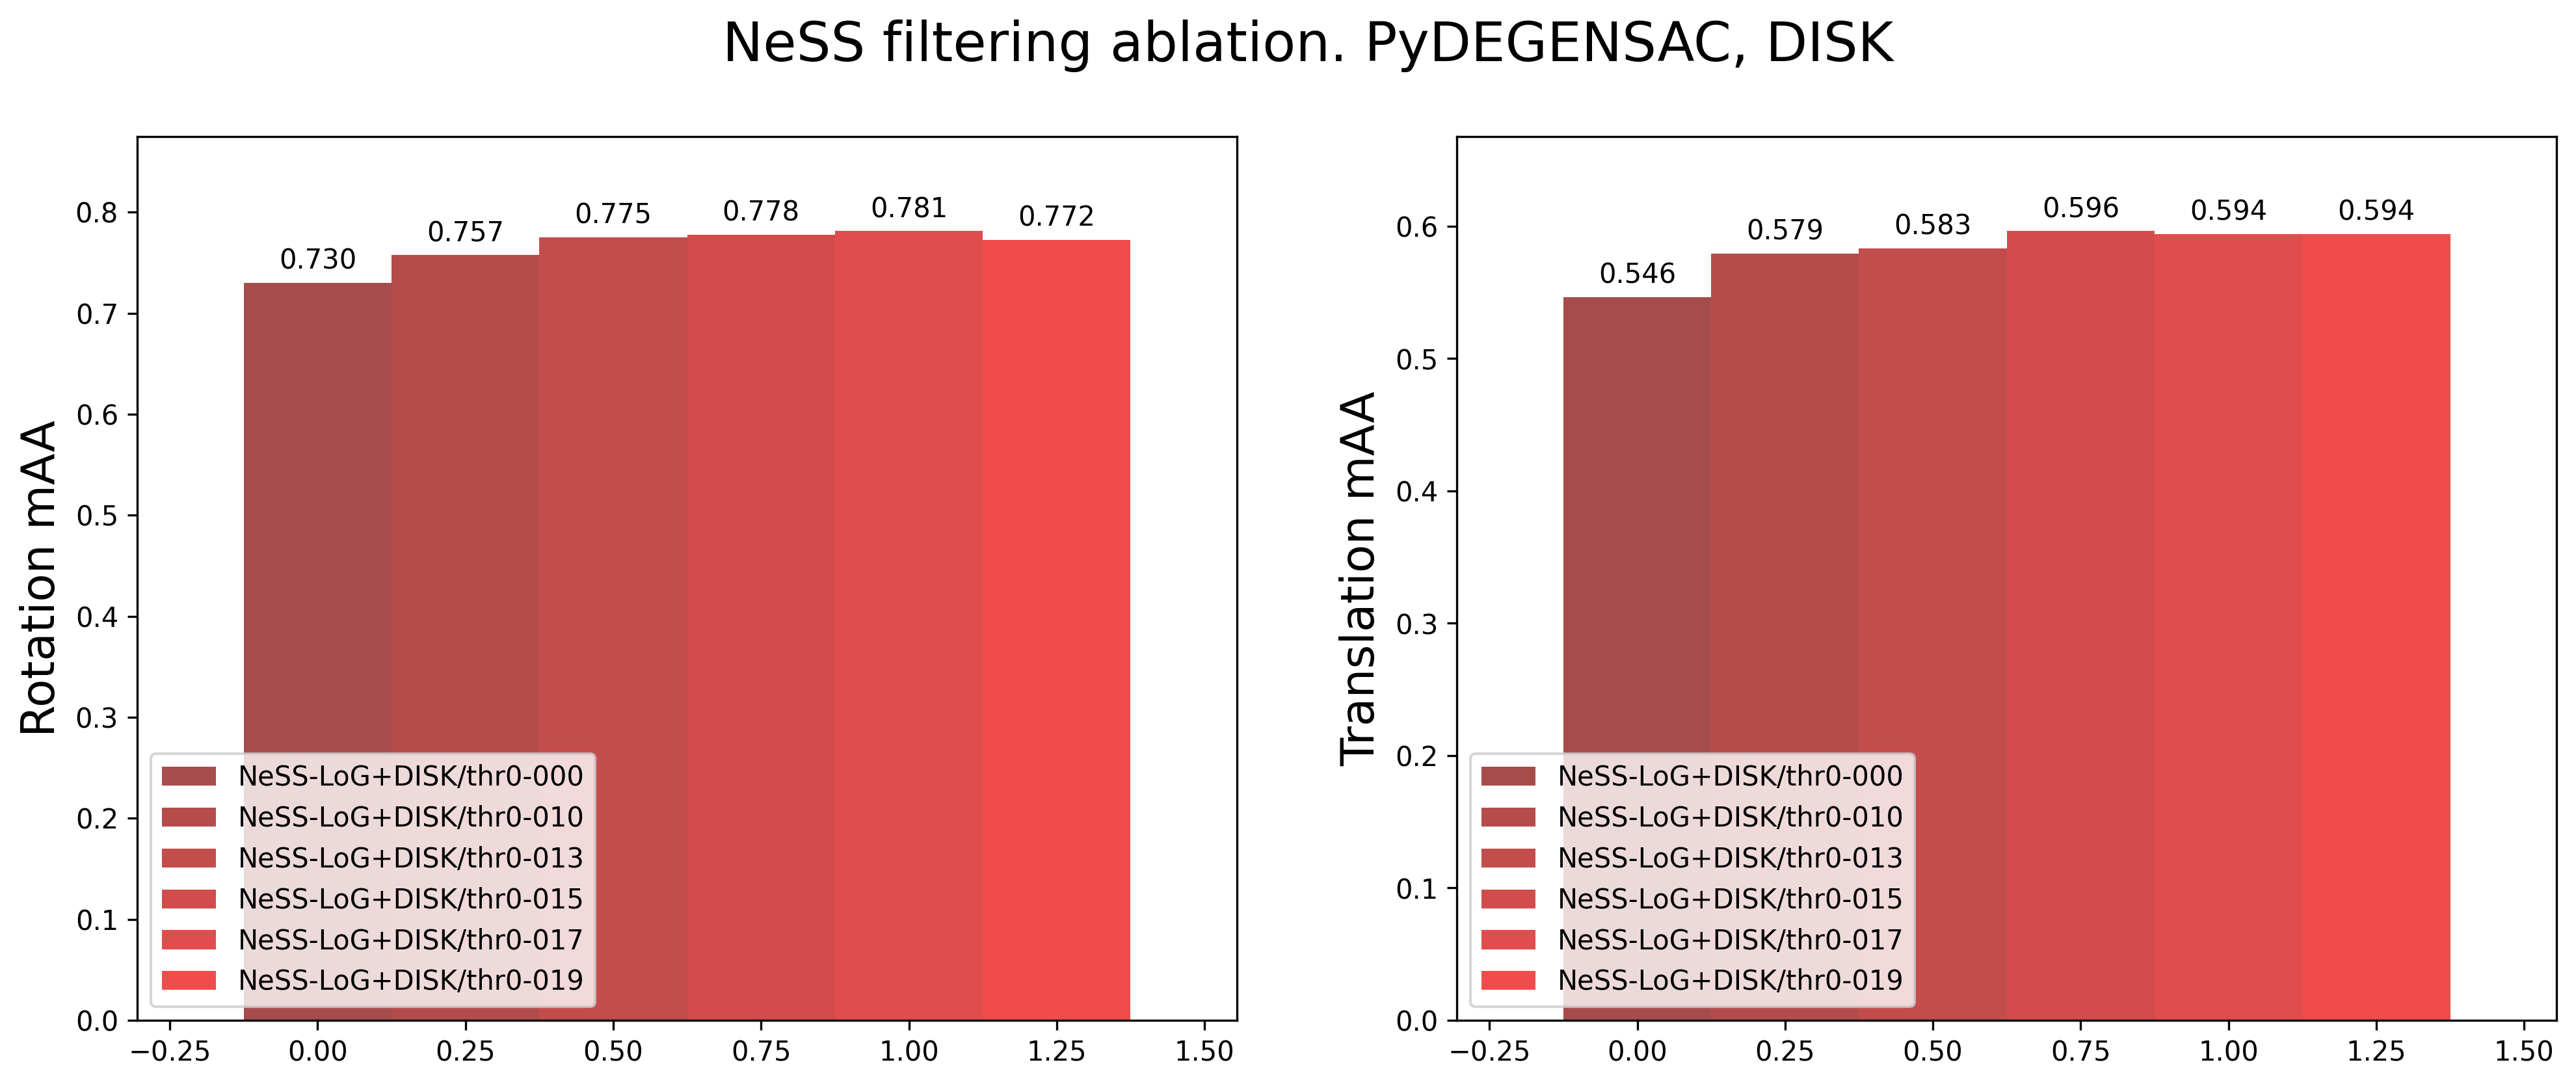

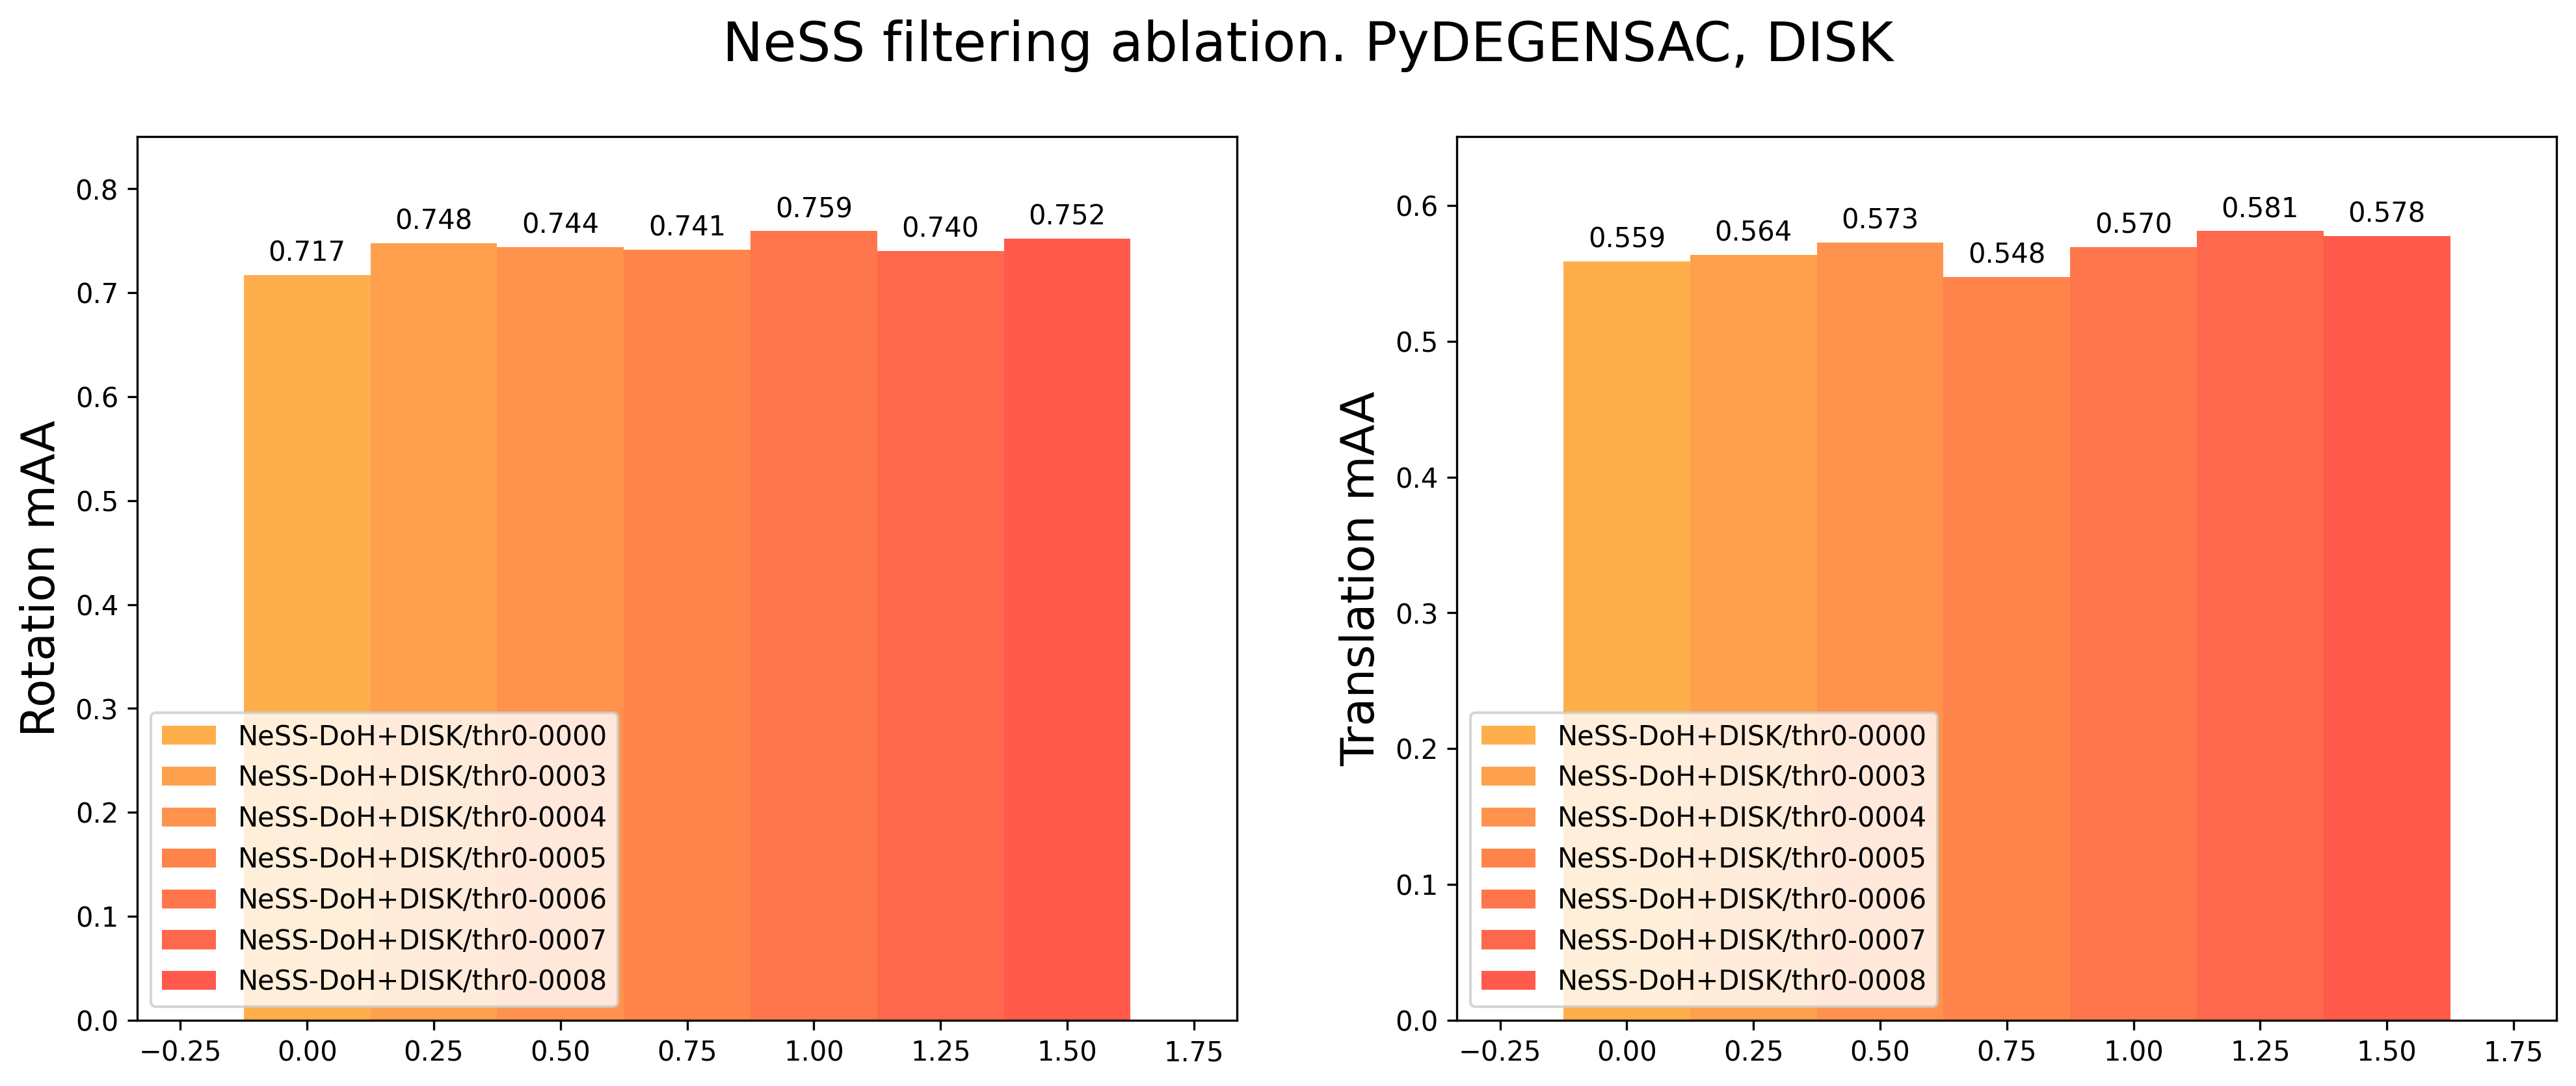

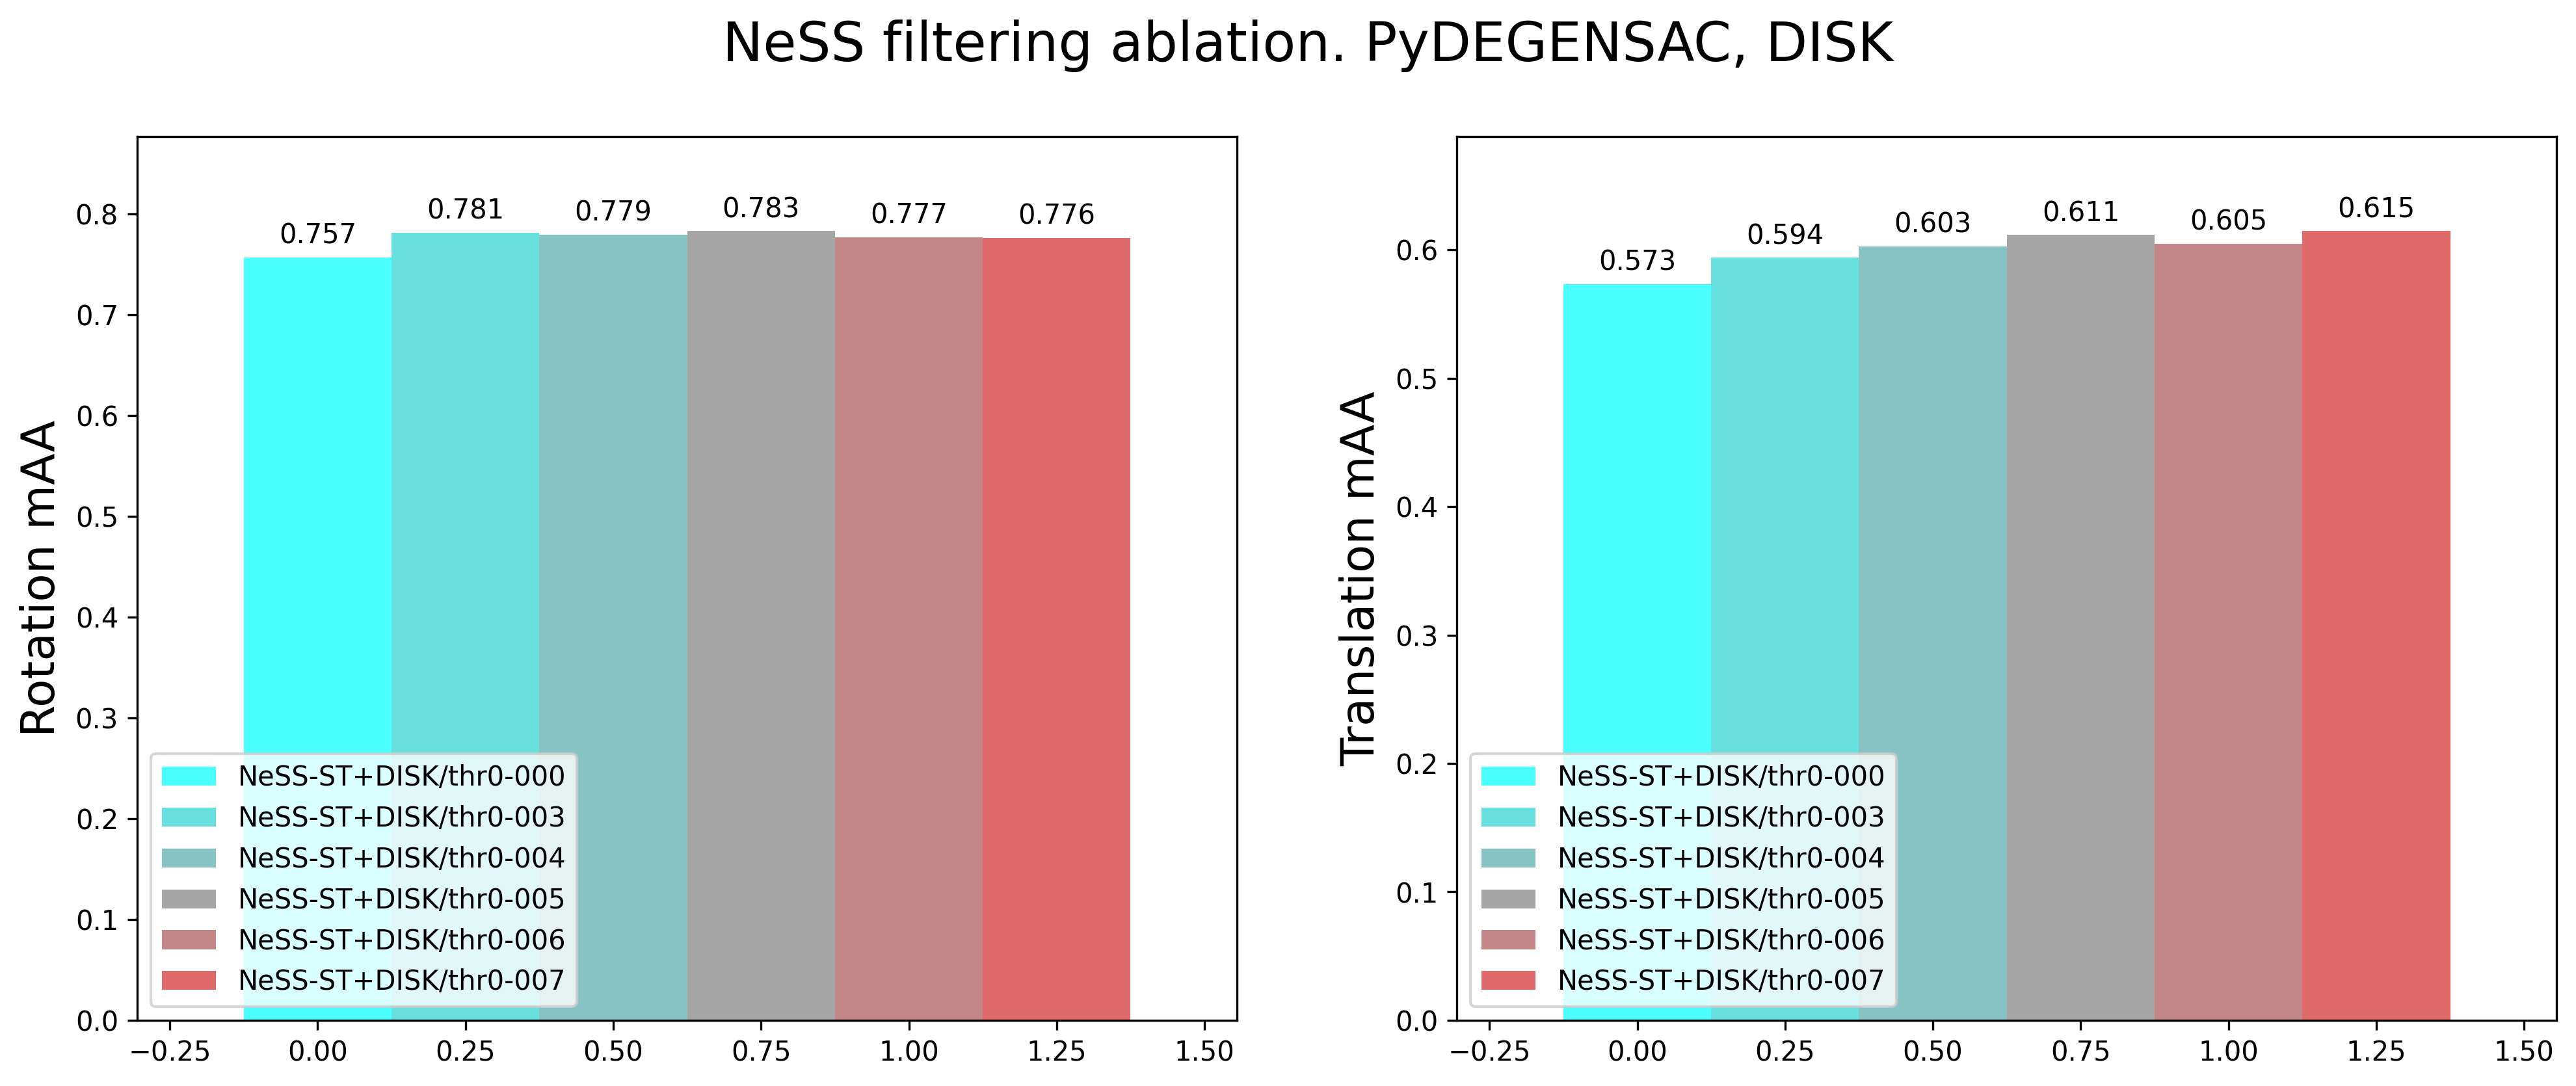

In [21]:
from source.evaluation.rel_pose.vis import RelPosemAAPlotter

vis_indices = None

RelPosemAAPlotter(methods_list,
                  r_acc_list, t_acc_list,
                  vis_indices).plot_all(save)

### Homography sampling ablation

In [22]:
from source.evaluation.vis import prepare_ablation_methods_list

ablation = 'homography'
ablation_title = 'NeSS homography ablation. PyDEGENSAC, DISK'

ness_ablation_methods = {    
    'shiness_disk': {eva_ns.COLOR: 'cyan',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-ST+DISK'}
}

methods_list = prepare_ablation_methods_list(ness_ablation_methods, ablation_methods_setup,
                                             test_dir, evaluation_task, ablation,
                                             ablation_title)

In [23]:
from source.evaluation.rel_pose.logging import load_rel_pose_eval

r_acc_list, t_acc_list, num_inl_list = load_rel_pose_eval(test_dir, evaluation_task, 
                                                          methods_list)

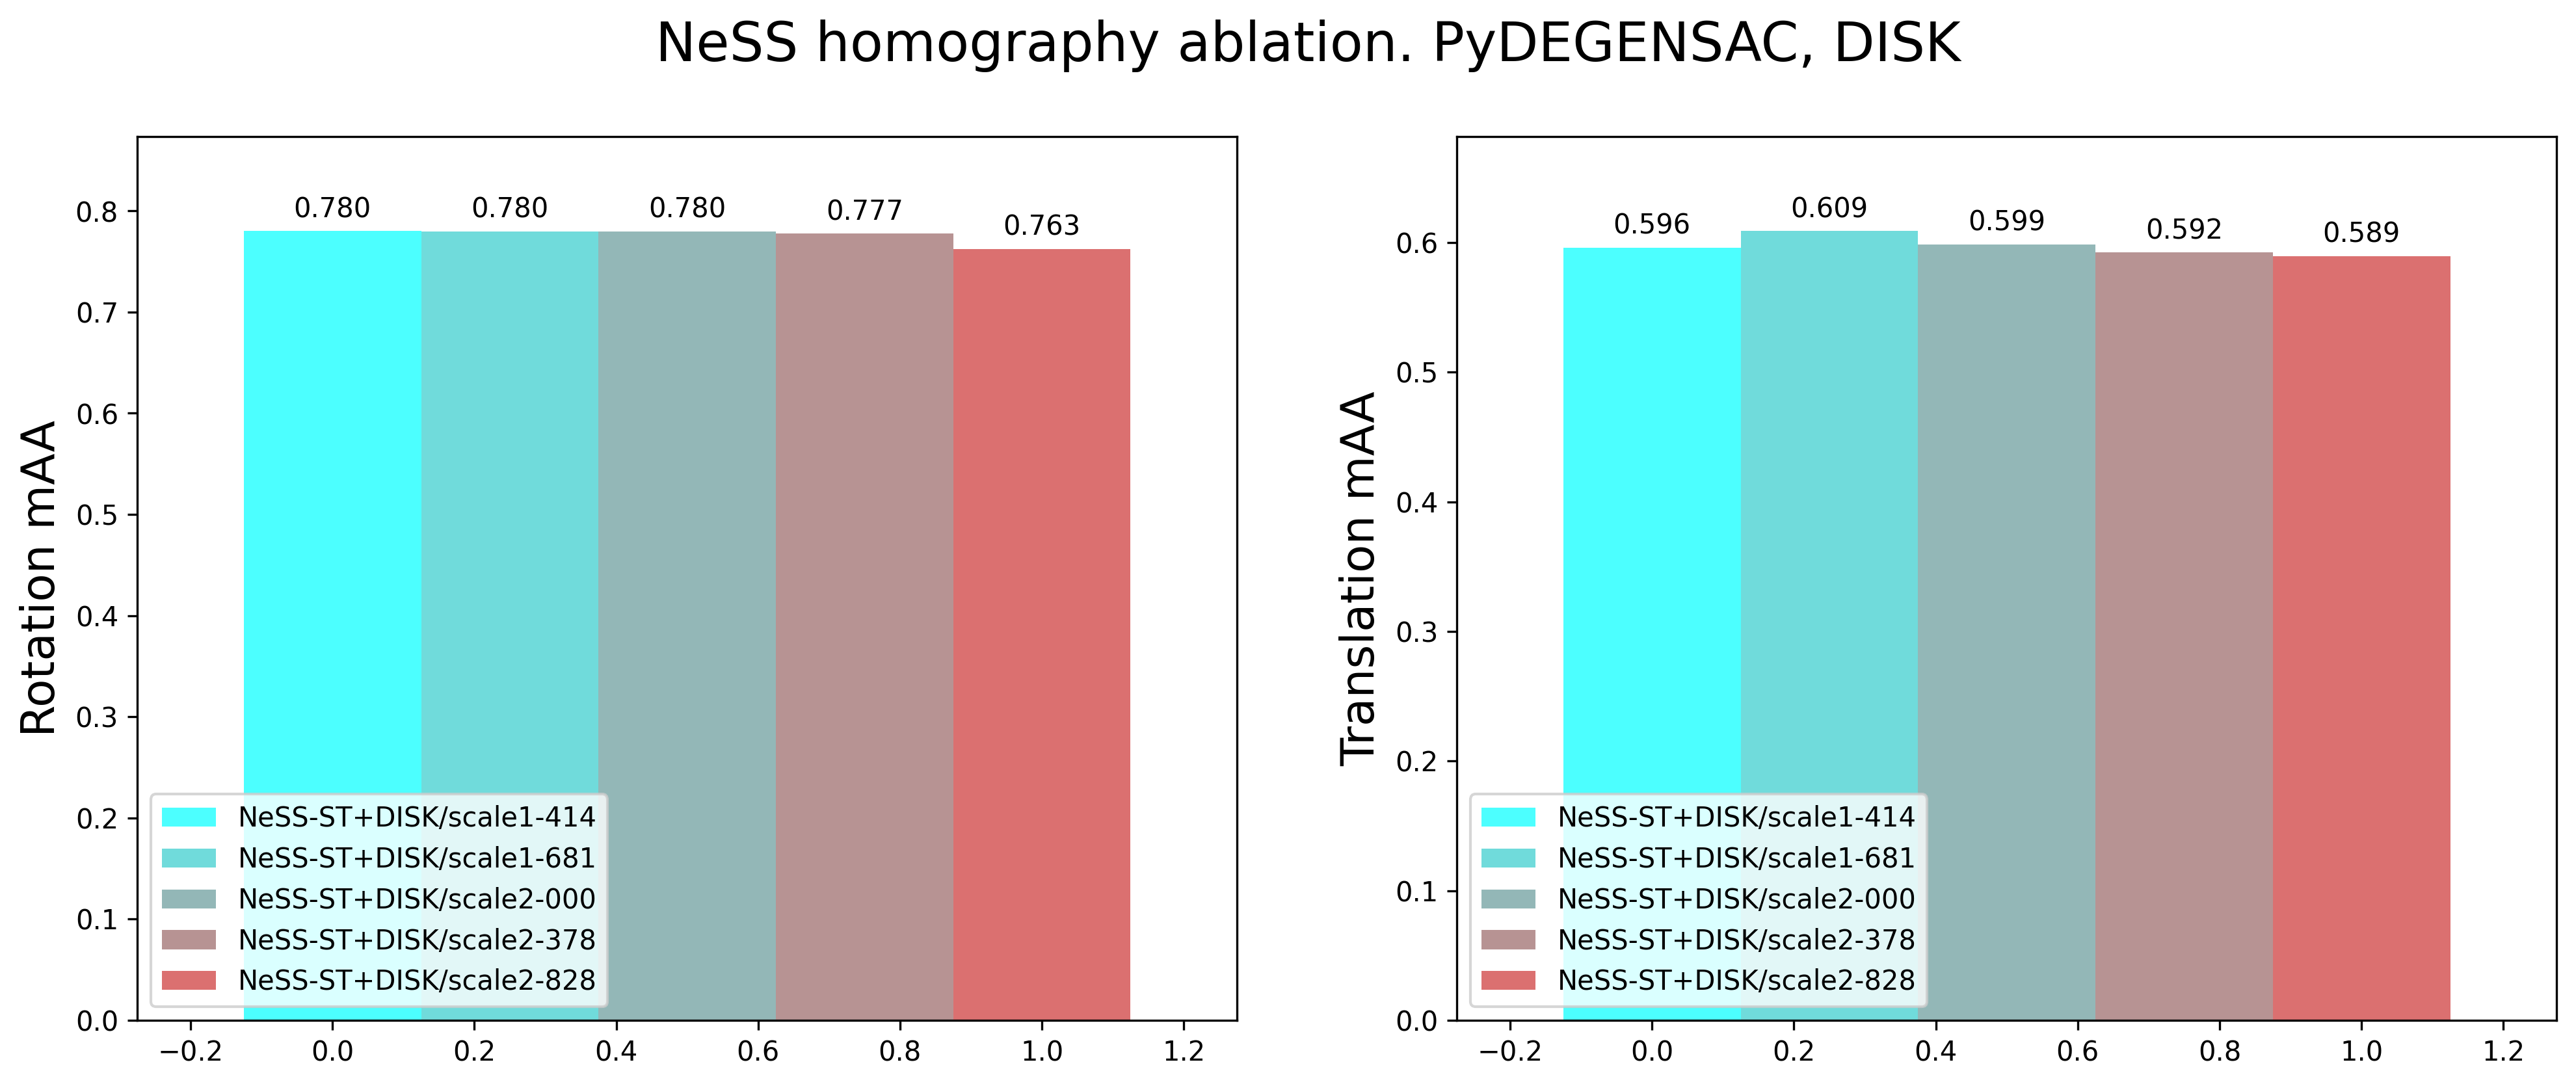

In [24]:
from source.evaluation.rel_pose.vis import RelPosemAAPlotter

vis_indices = None

RelPosemAAPlotter(methods_list,
                  r_acc_list, t_acc_list,
                  vis_indices).plot_all(save)

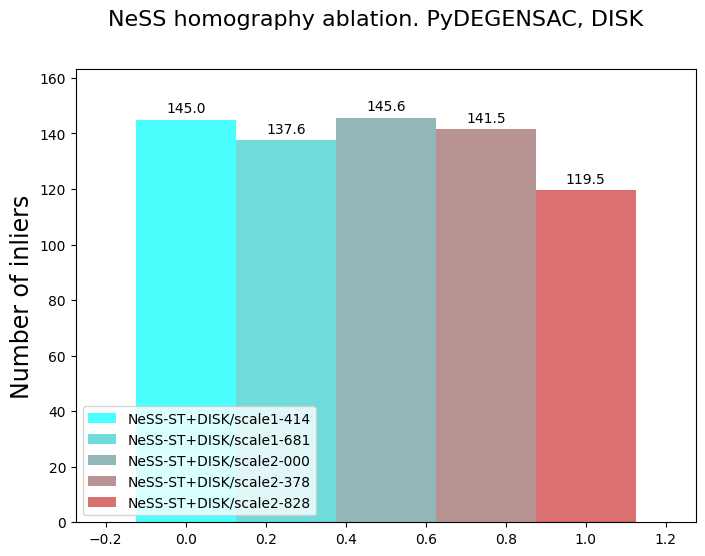

In [25]:
from source.evaluation.rel_pose.vis import RelPoseNumInlPlotter

RelPoseNumInlPlotter(methods_list,
                     num_inl_list,
                     vis_indices).plot_all(save)

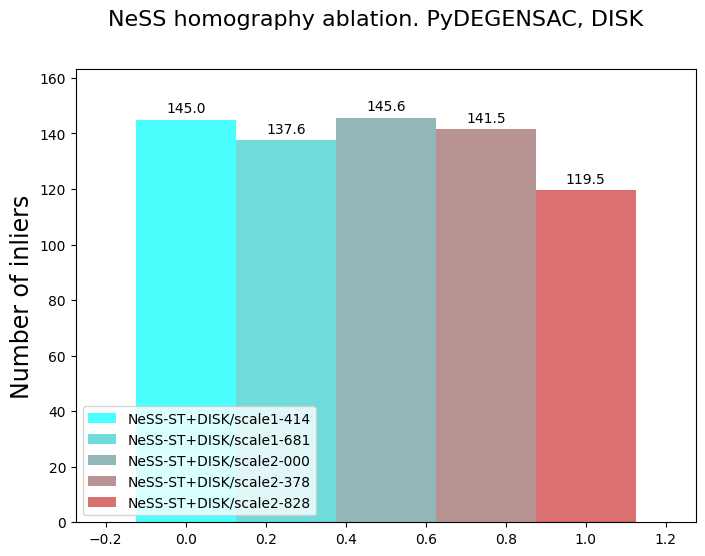

In [26]:
from source.evaluation.rel_pose.vis import RelPoseNumInlPlotter

RelPoseNumInlPlotter(methods_list,
                     num_inl_list,
                     vis_indices).plot_all(save)

## SS, RS, NeSS and NeRS ablations

In [27]:
ss_rs_methods = {
    'shi_disk': {eva_ns.COLOR: 'lightskyblue',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'Shi-Tomasi+DISK'},
    
    'shiss_disk': {eva_ns.COLOR: 'coral',
                   eva_ns.LINE_STYLE: '--',
                   eva_ns.ALIAS: 'SS-ST+DISK'},
    
    'shirs_disk': {eva_ns.COLOR: 'linen',
                   eva_ns.LINE_STYLE: '--',
                   eva_ns.ALIAS: 'RS-ST+DISK'},
    
    'shiness_disk': {eva_ns.COLOR: 'cyan',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-ST+DISK'},
    
    'shiners_disk': {eva_ns.COLOR: 'lavender',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeRS-ST+DISK'}
}

In [28]:
ss_rs_methods_disk_f_pydegensac = {
    eva_ns.BACKEND: 'f_pydegensac/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: ss_rs_methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'SS, RS, NeSS and NeRS ablation. PyDEGENSAC, DISK',
        eva_ns.SAVE_DIR: 'figures/test/ss',        
        eva_ns.SAVE_NAME: 'disk.pdf',
        
        eva_ns.NUM_INL: {
            eva_ns.TITLE_FONT_SIZE: 16,
            eva_ns.SAVE_DIR: 'figures/test/ss/num_inl',
            eva_ns.SAVE_NAME: 'disk.pdf',
            
            eva_ns.FONT_SIZE: 10
        }
    }
}

In [29]:
from source.evaluation.vis import prepare_methods_list

save = False
# save = True

select = None

methods_list = prepare_methods_list([ss_rs_methods_disk_f_pydegensac], select)

In [30]:
from source.evaluation.rel_pose.logging import load_rel_pose_eval

r_acc_list, t_acc_list, num_inl_list = load_rel_pose_eval(test_dir, evaluation_task, methods_list)

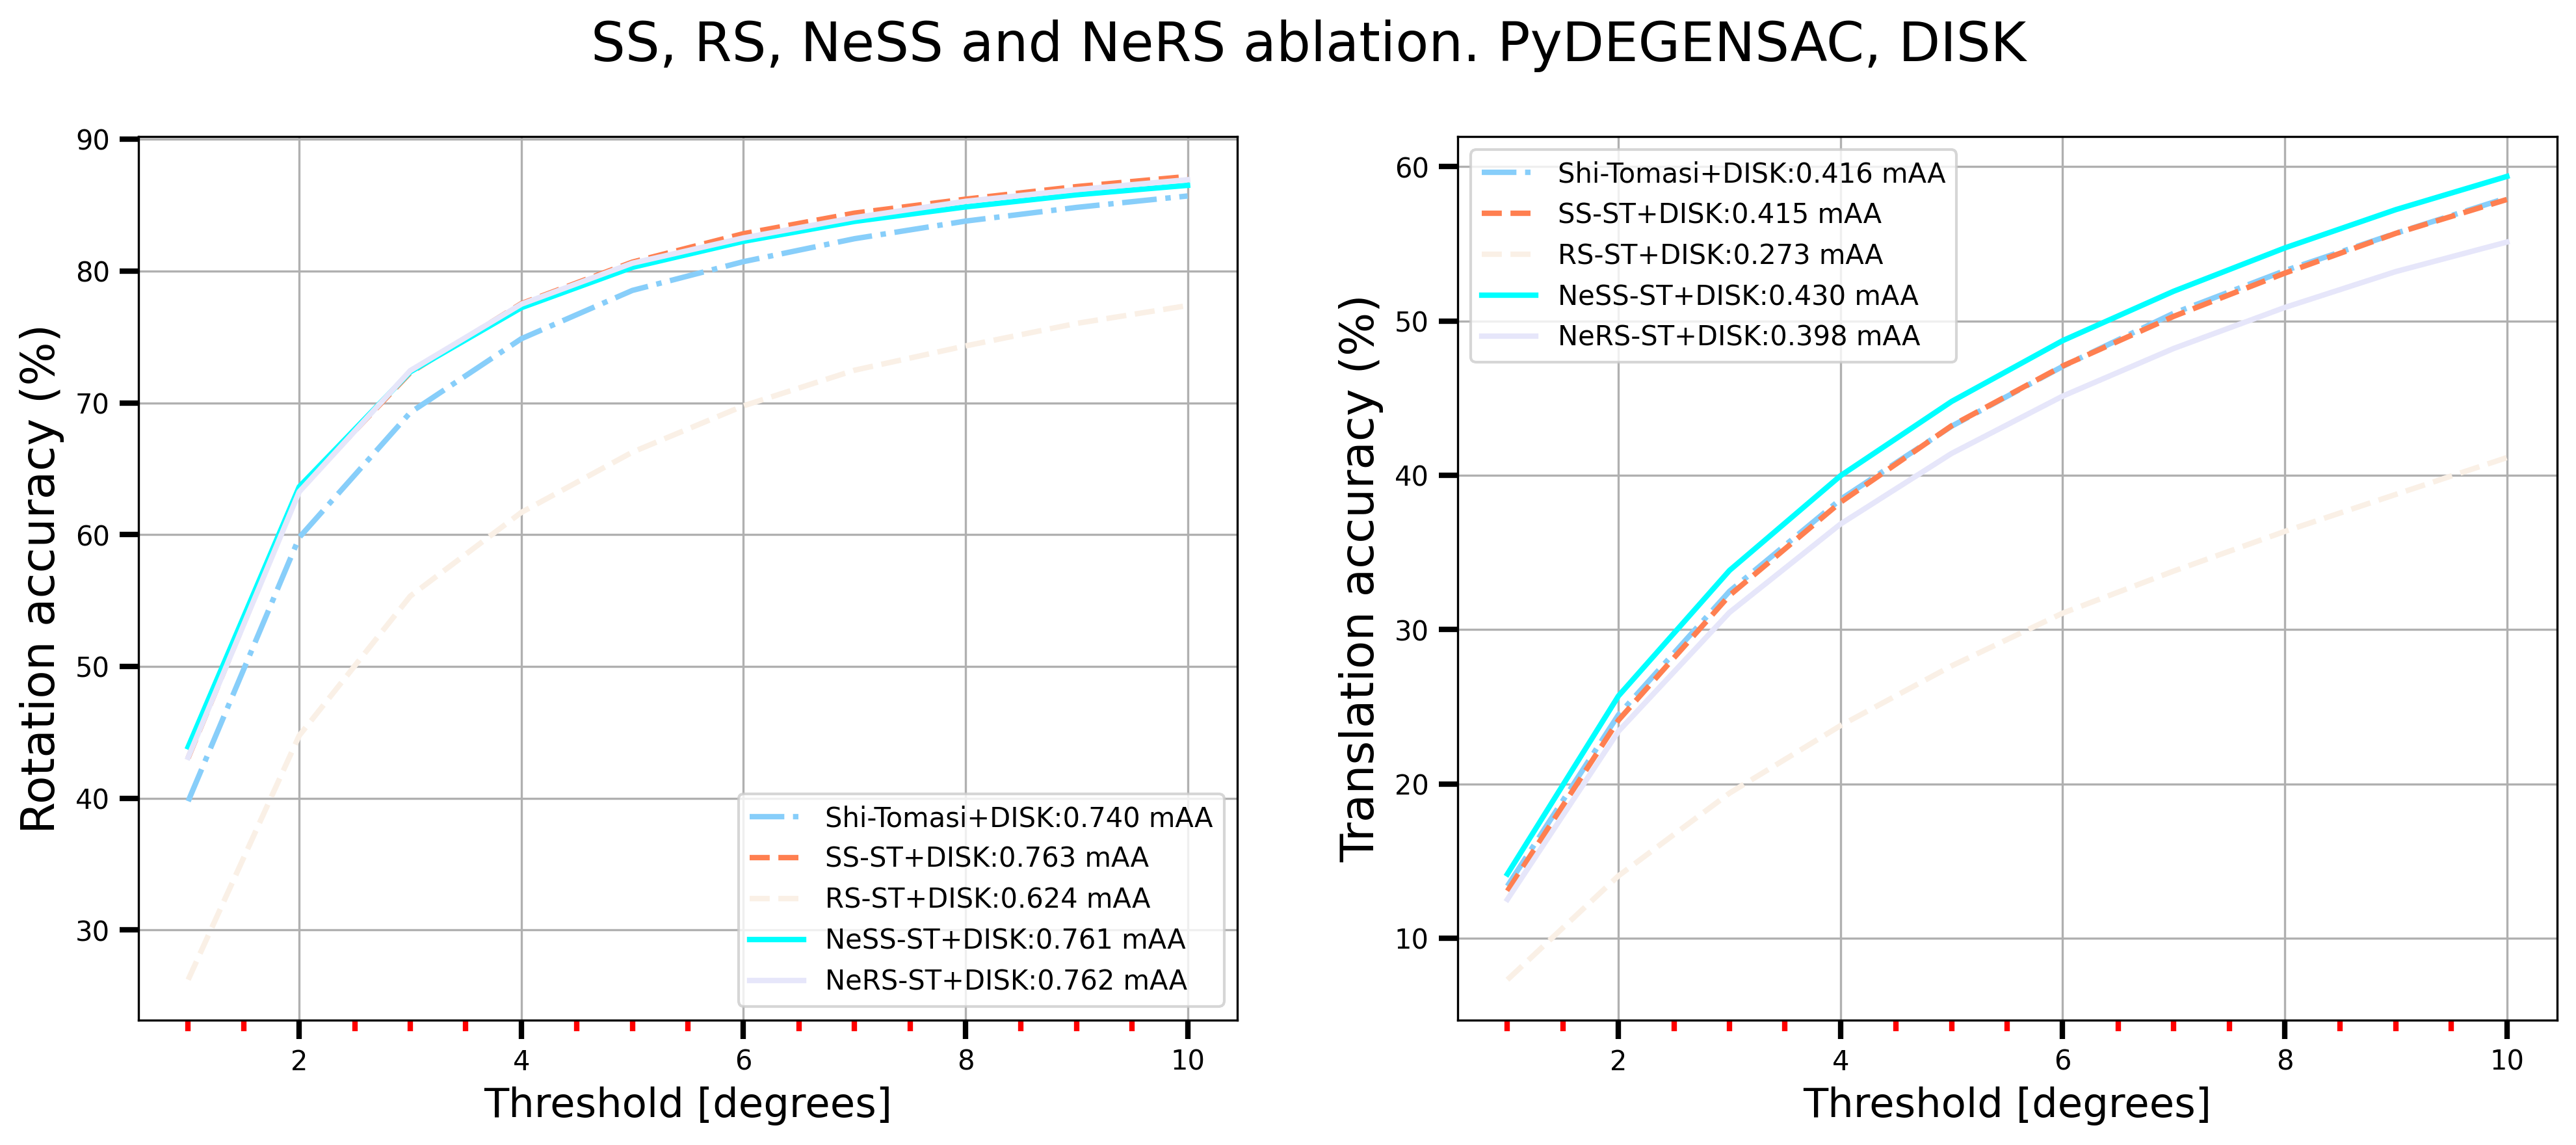

In [31]:
from source.evaluation.rel_pose.vis import RelPoseAccuracyPlotter

vis_indices = None

RelPoseAccuracyPlotter(methods_list,
                       r_acc_list, t_acc_list,
                       vis_indices).plot_all(save)

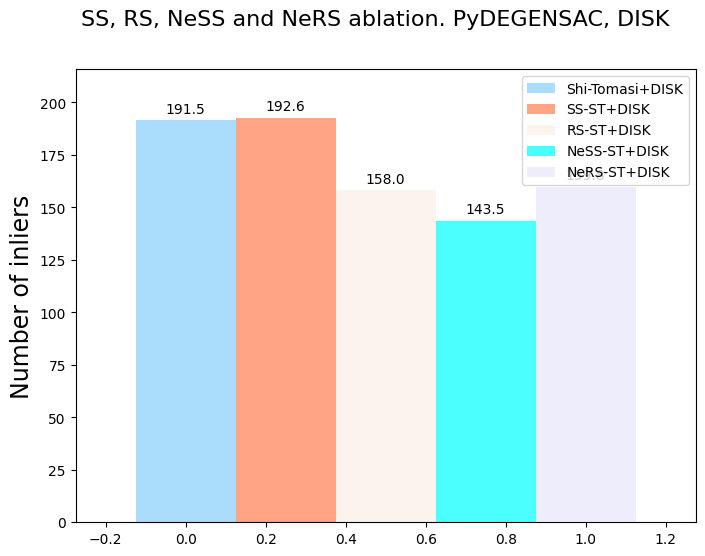

In [32]:
from source.evaluation.rel_pose.vis import RelPoseNumInlPlotter

RelPoseNumInlPlotter(methods_list,
                     num_inl_list,
                     vis_indices).plot_all(save)

### Filtering ablation for SS and RS during testing

In [33]:
ss_rs_ablation_methods_setup = {
    eva_ns.BACKEND: 'f_pydegensac/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.PLOT_PARAMS: {        
        eva_ns.R_T_MAA: {
            eva_ns.SAVE_DIR: 'figures/test/ss/{}_ablation',
            eva_ns.SAVE_NAME: '{}.pdf',
            
            eva_ns.FONT_SIZE: 10,
            eva_ns.LEGEND_LOC: ['lower right', 'lower right']
        },
        
        eva_ns.NUM_INL: {
            eva_ns.TITLE_FONT_SIZE: 16,
            eva_ns.SAVE_DIR: 'figures/test/ss/{}_ablation/num_inl',
            eva_ns.SAVE_NAME: '{}.pdf',
            
            eva_ns.FONT_SIZE: 10,
            eva_ns.LEGEND_LOC: 'lower left'
        }
    }
}

In [34]:
from source.evaluation.vis import prepare_ablation_methods_list

ablation = 'filtering'
ablation_title = 'SS and RS filtering ablation. PyDEGENSAC, DISK'

ss_rs_ablation_methods = {    
    'shiss_disk': {eva_ns.COLOR: 'coral',
                   eva_ns.LINE_STYLE: '-',
                   eva_ns.ALIAS: 'SS-ST+DISK'},
    
    'shirs_disk': {eva_ns.COLOR: 'linen',
                   eva_ns.LINE_STYLE: '--',
                   eva_ns.ALIAS: 'RS-ST+DISK'}
}

methods_list = prepare_ablation_methods_list(ss_rs_ablation_methods, ss_rs_ablation_methods_setup,
                                             test_dir, evaluation_task, ablation,
                                             ablation_title)

In [35]:
from source.evaluation.rel_pose.logging import load_rel_pose_eval

r_acc_list, t_acc_list, num_inl_list = load_rel_pose_eval(test_dir, evaluation_task, 
                                                          methods_list)

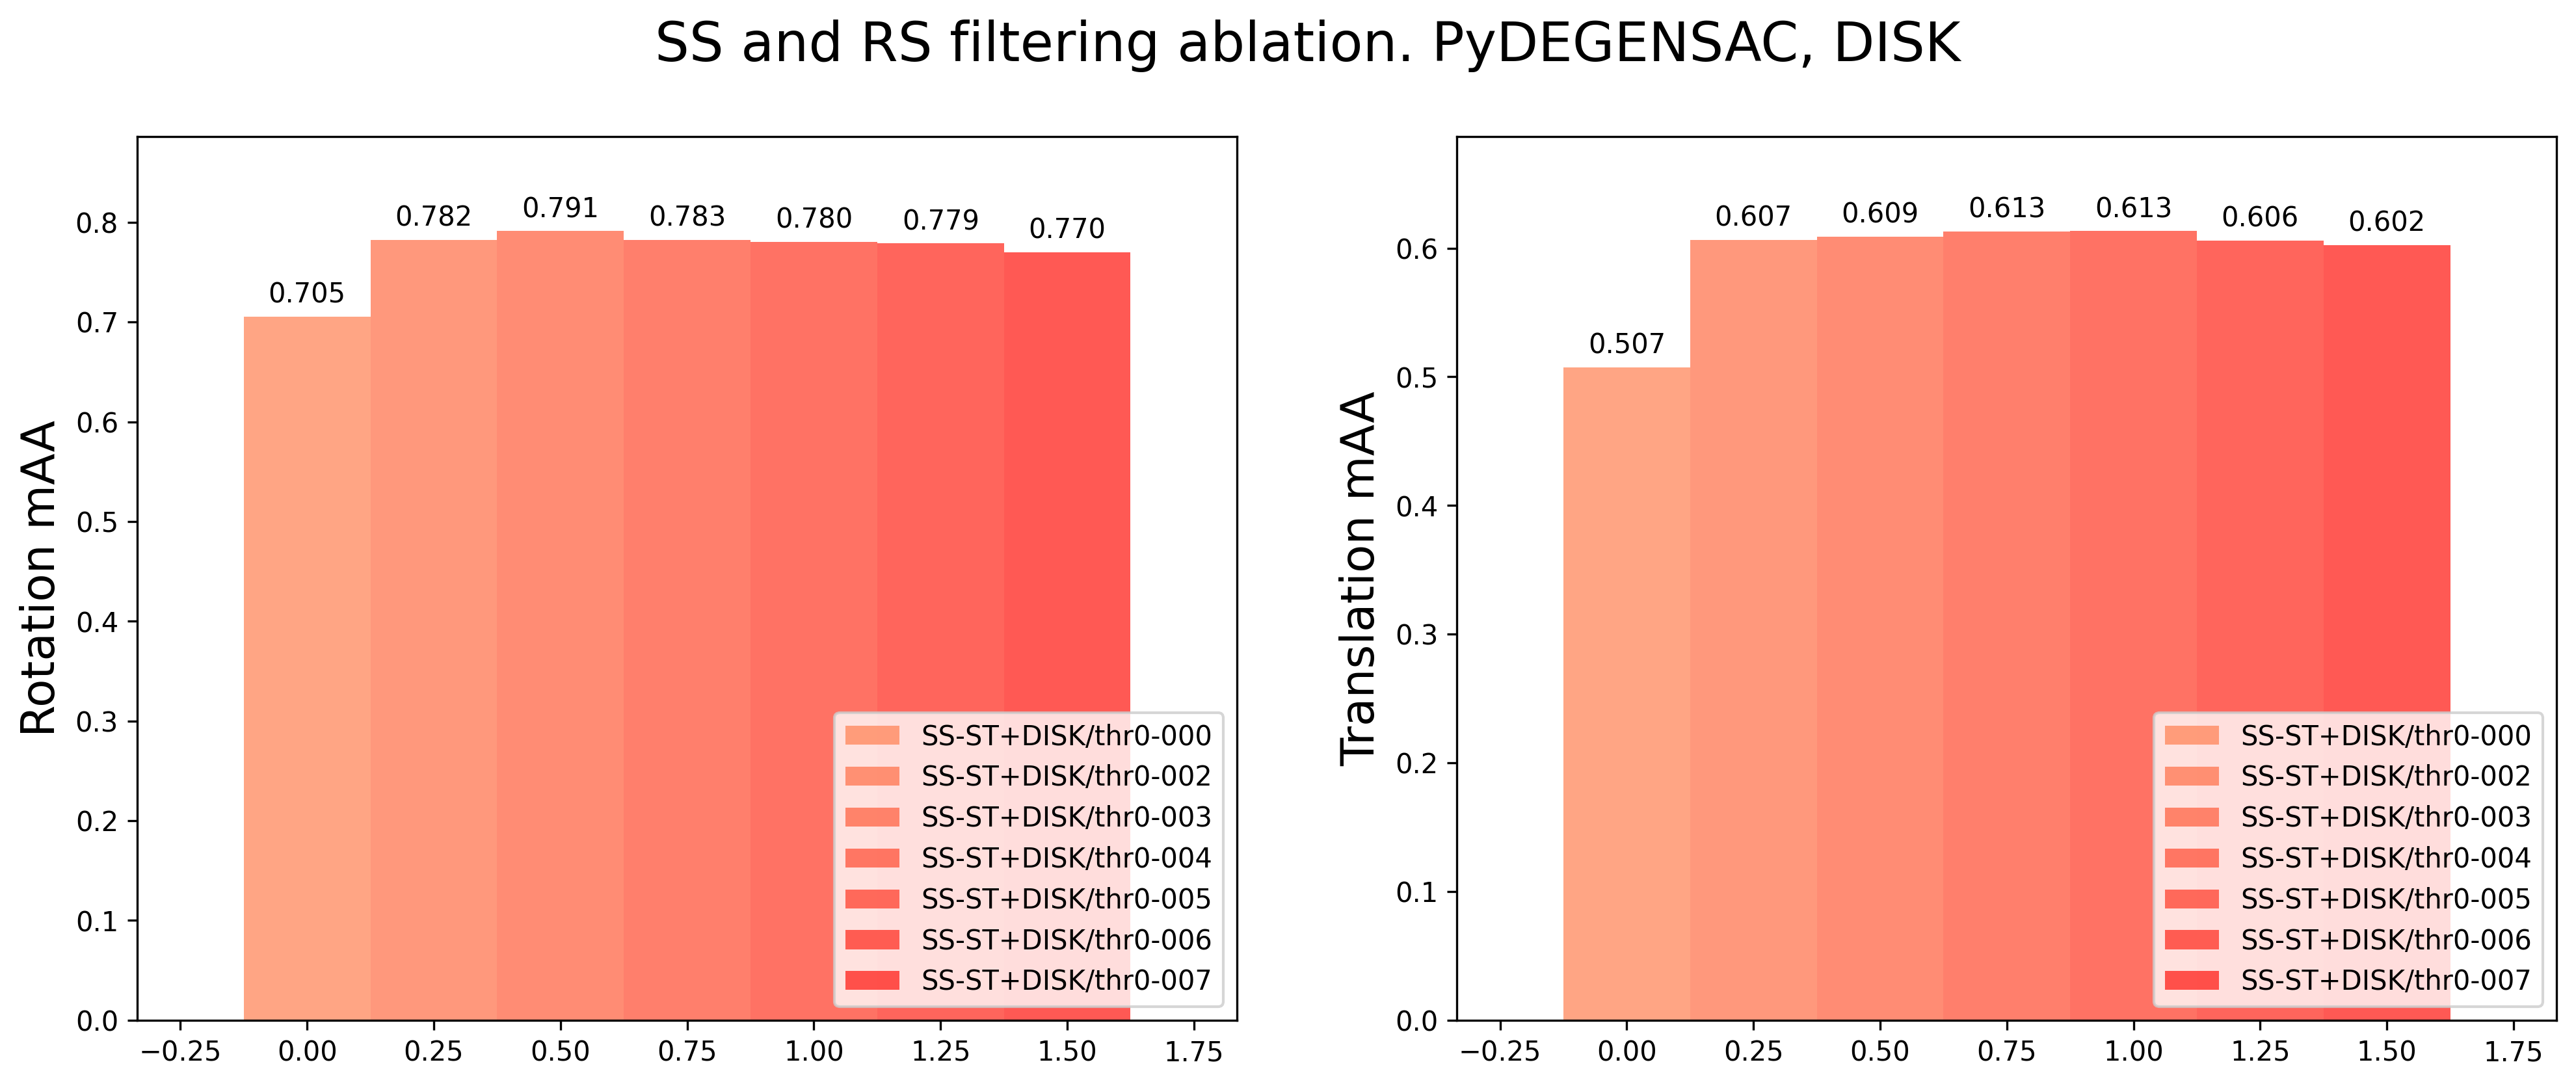

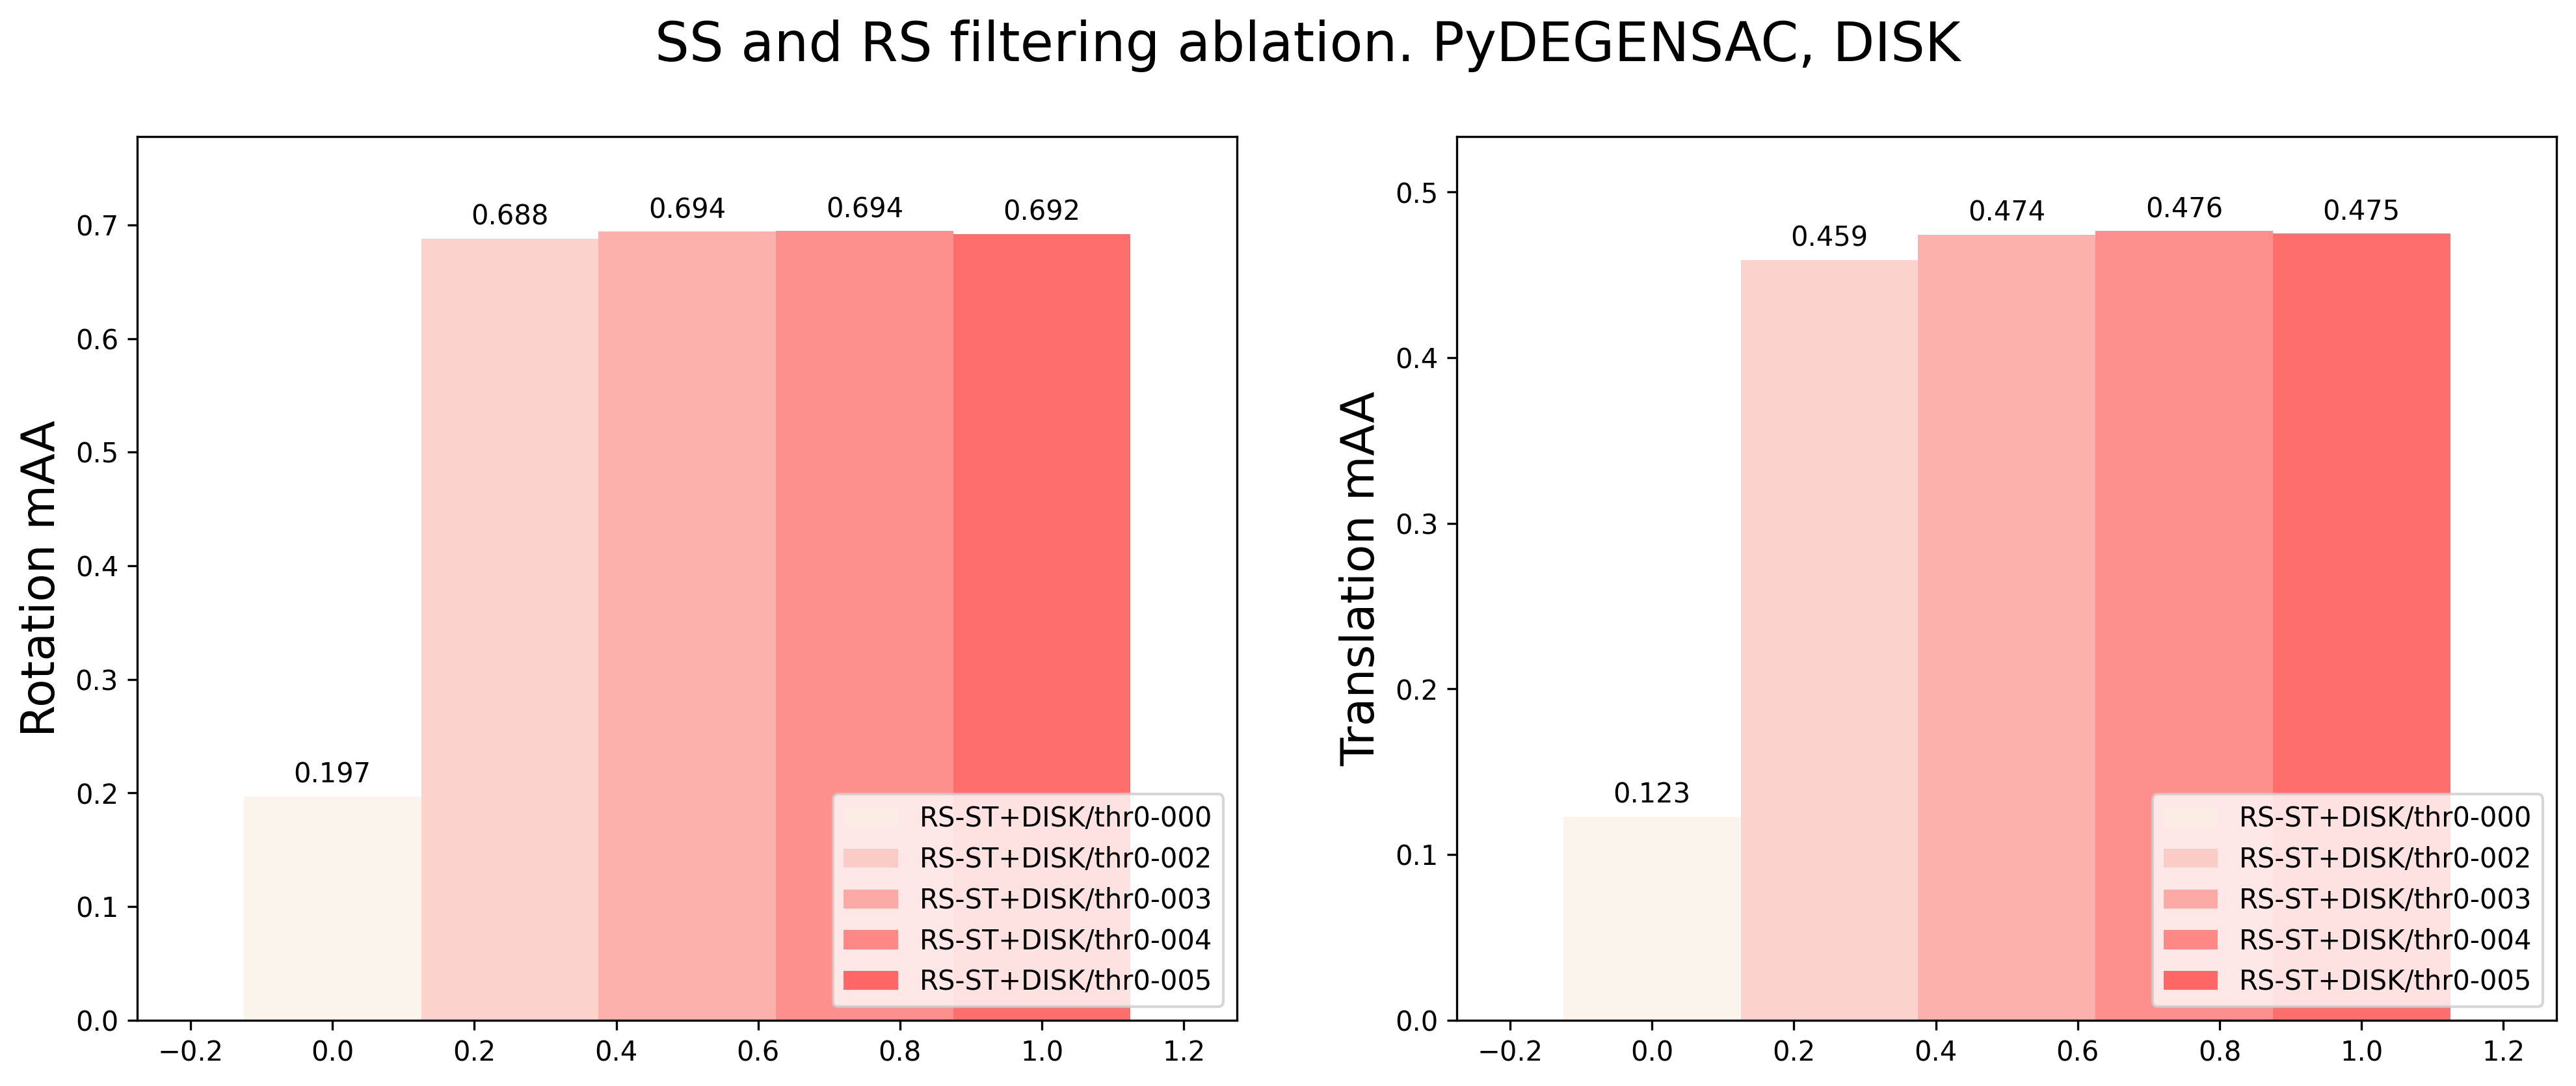

In [36]:
from source.evaluation.rel_pose.vis import RelPosemAAPlotter

vis_indices = None

RelPosemAAPlotter(methods_list,
                  r_acc_list, t_acc_list,
                  vis_indices).plot_all(save)

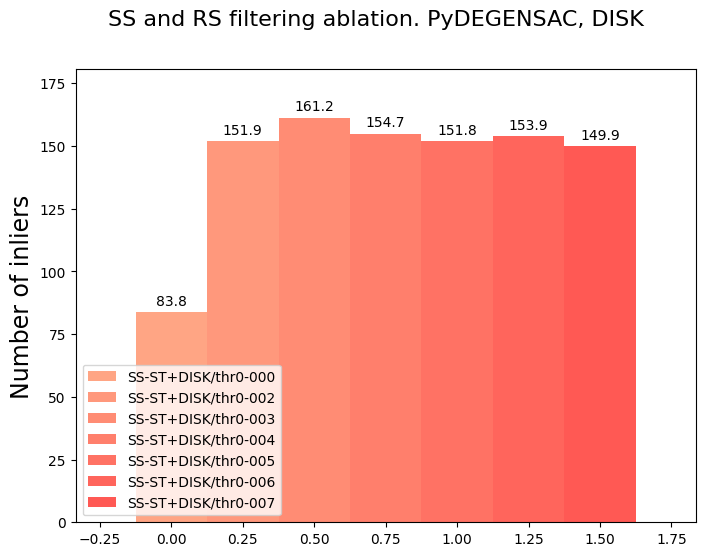

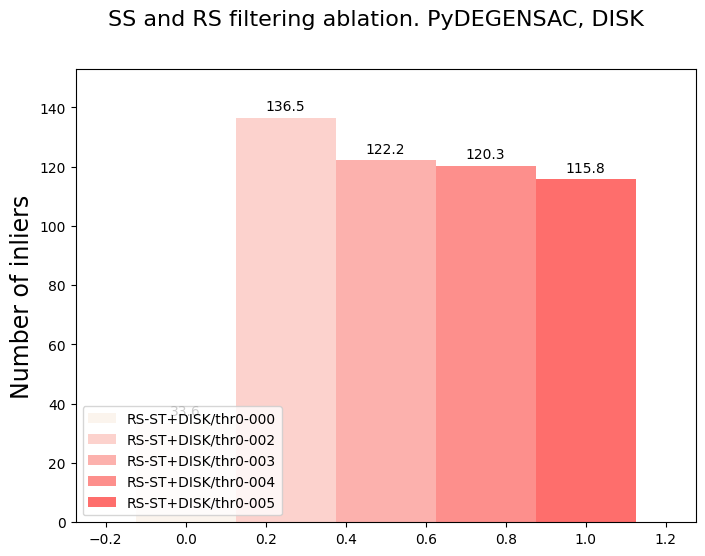

In [37]:
from source.evaluation.rel_pose.vis import RelPoseNumInlPlotter

RelPoseNumInlPlotter(methods_list,
                     num_inl_list,
                     vis_indices).plot_all(save)

## Number of features ablation

In [38]:
methods_disk_f_pydegensac_128 = {
    eva_ns.BACKEND: 'f_pydegensac/128',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'PyDEGENSAC, DISK, 128 features',
        eva_ns.SAVE_DIR: 'figures/test/num_features/128',        
        eva_ns.SAVE_NAME: 'disk.pdf',
        
        eva_ns.NUM_INL: {
            eva_ns.SAVE_DIR: 'figures/test/num_features/128/num_inl',
            eva_ns.SAVE_NAME: 'disk.pdf',
            
            eva_ns.FONT_SIZE: 10
        },
        
        eva_ns.CAT_ABL: {
            eva_ns.SAVE_DIR: 'figures/test/num_features/128/cat_abl',
            eva_ns.SAVE_NAME: 'disk.pdf',
            
            eva_ns.FONT_SIZE: 3.5,
            eva_ns.LEGEND_LOC: ['lower left', 'lower right']
        }
    }
}

In [39]:
methods_disk_f_pydegensac_512 = {
    eva_ns.BACKEND: 'f_pydegensac/512',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'PyDEGENSAC, DISK, 512 features',
        eva_ns.SAVE_DIR: 'figures/test/num_features/512',        
        eva_ns.SAVE_NAME: 'disk.pdf',
        
        eva_ns.NUM_INL: {
            eva_ns.SAVE_DIR: 'figures/test/num_features/512/num_inl',
            eva_ns.SAVE_NAME: 'disk.pdf',
            
            eva_ns.FONT_SIZE: 10
        },
        
        eva_ns.CAT_ABL: {
            eva_ns.SAVE_DIR: 'figures/test/num_features/512/cat_abl',
            eva_ns.SAVE_NAME: 'disk.pdf',
            
            eva_ns.FONT_SIZE: 3.5,
            eva_ns.LEGEND_LOC: ['lower left', 'lower right']
        }
    }
}

In [40]:
from source.evaluation.vis import prepare_methods_list

save = False
# save = True

select = None

methods_list = prepare_methods_list([methods_disk_f_pydegensac_128,
                                     methods_disk_f_pydegensac_512], select)

In [41]:
from source.evaluation.rel_pose.logging import load_rel_pose_eval

r_acc_list, t_acc_list, num_inl_list = load_rel_pose_eval(test_dir, evaluation_task, methods_list)

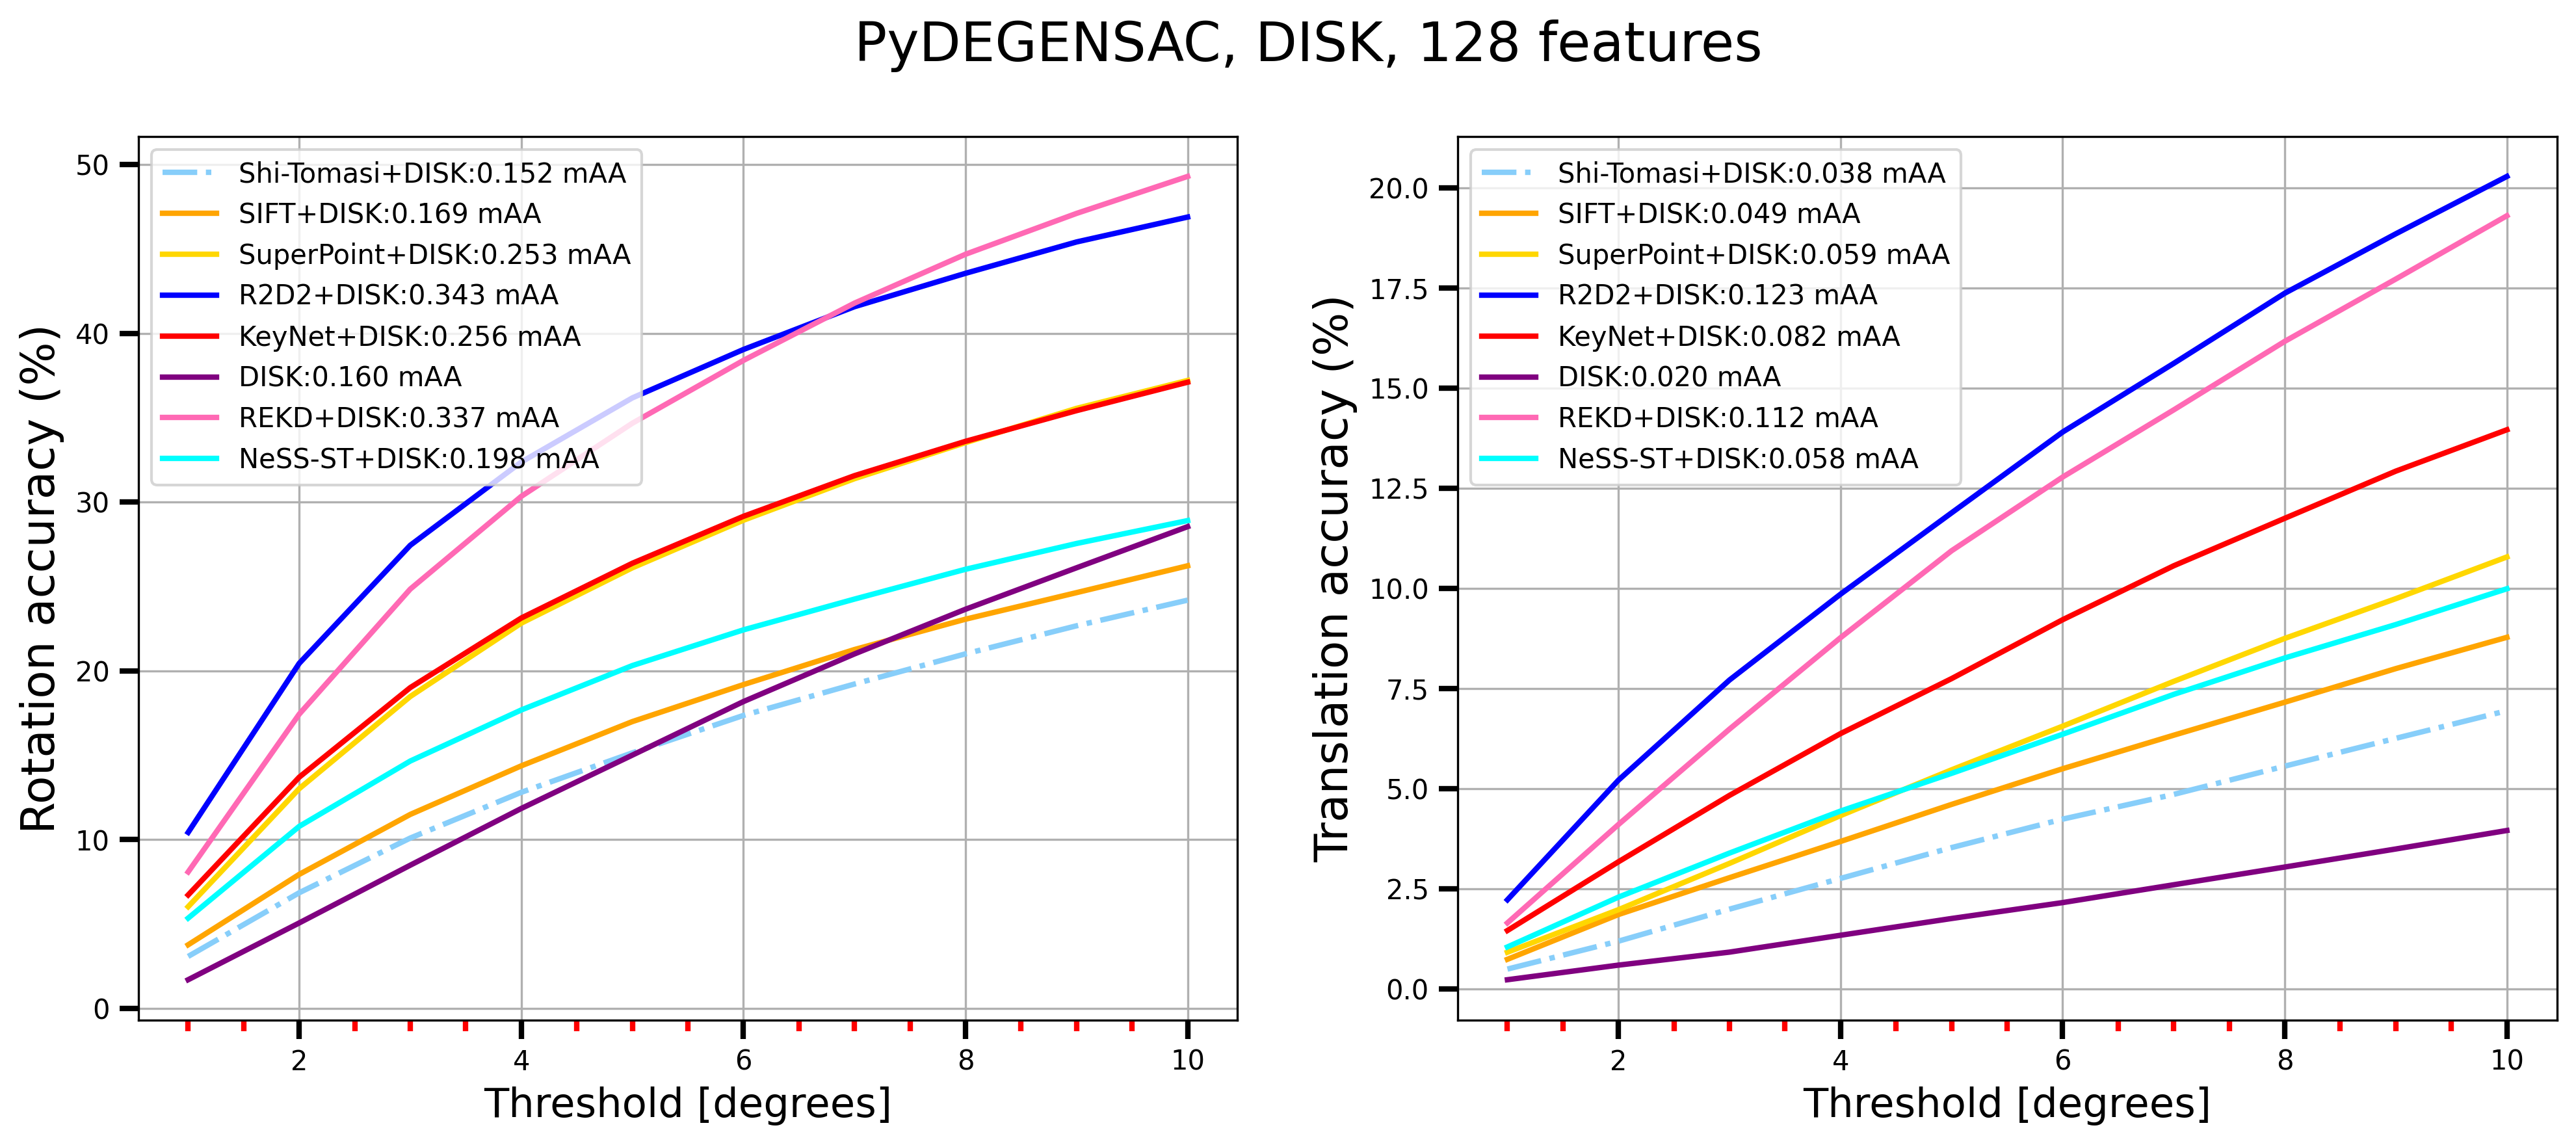

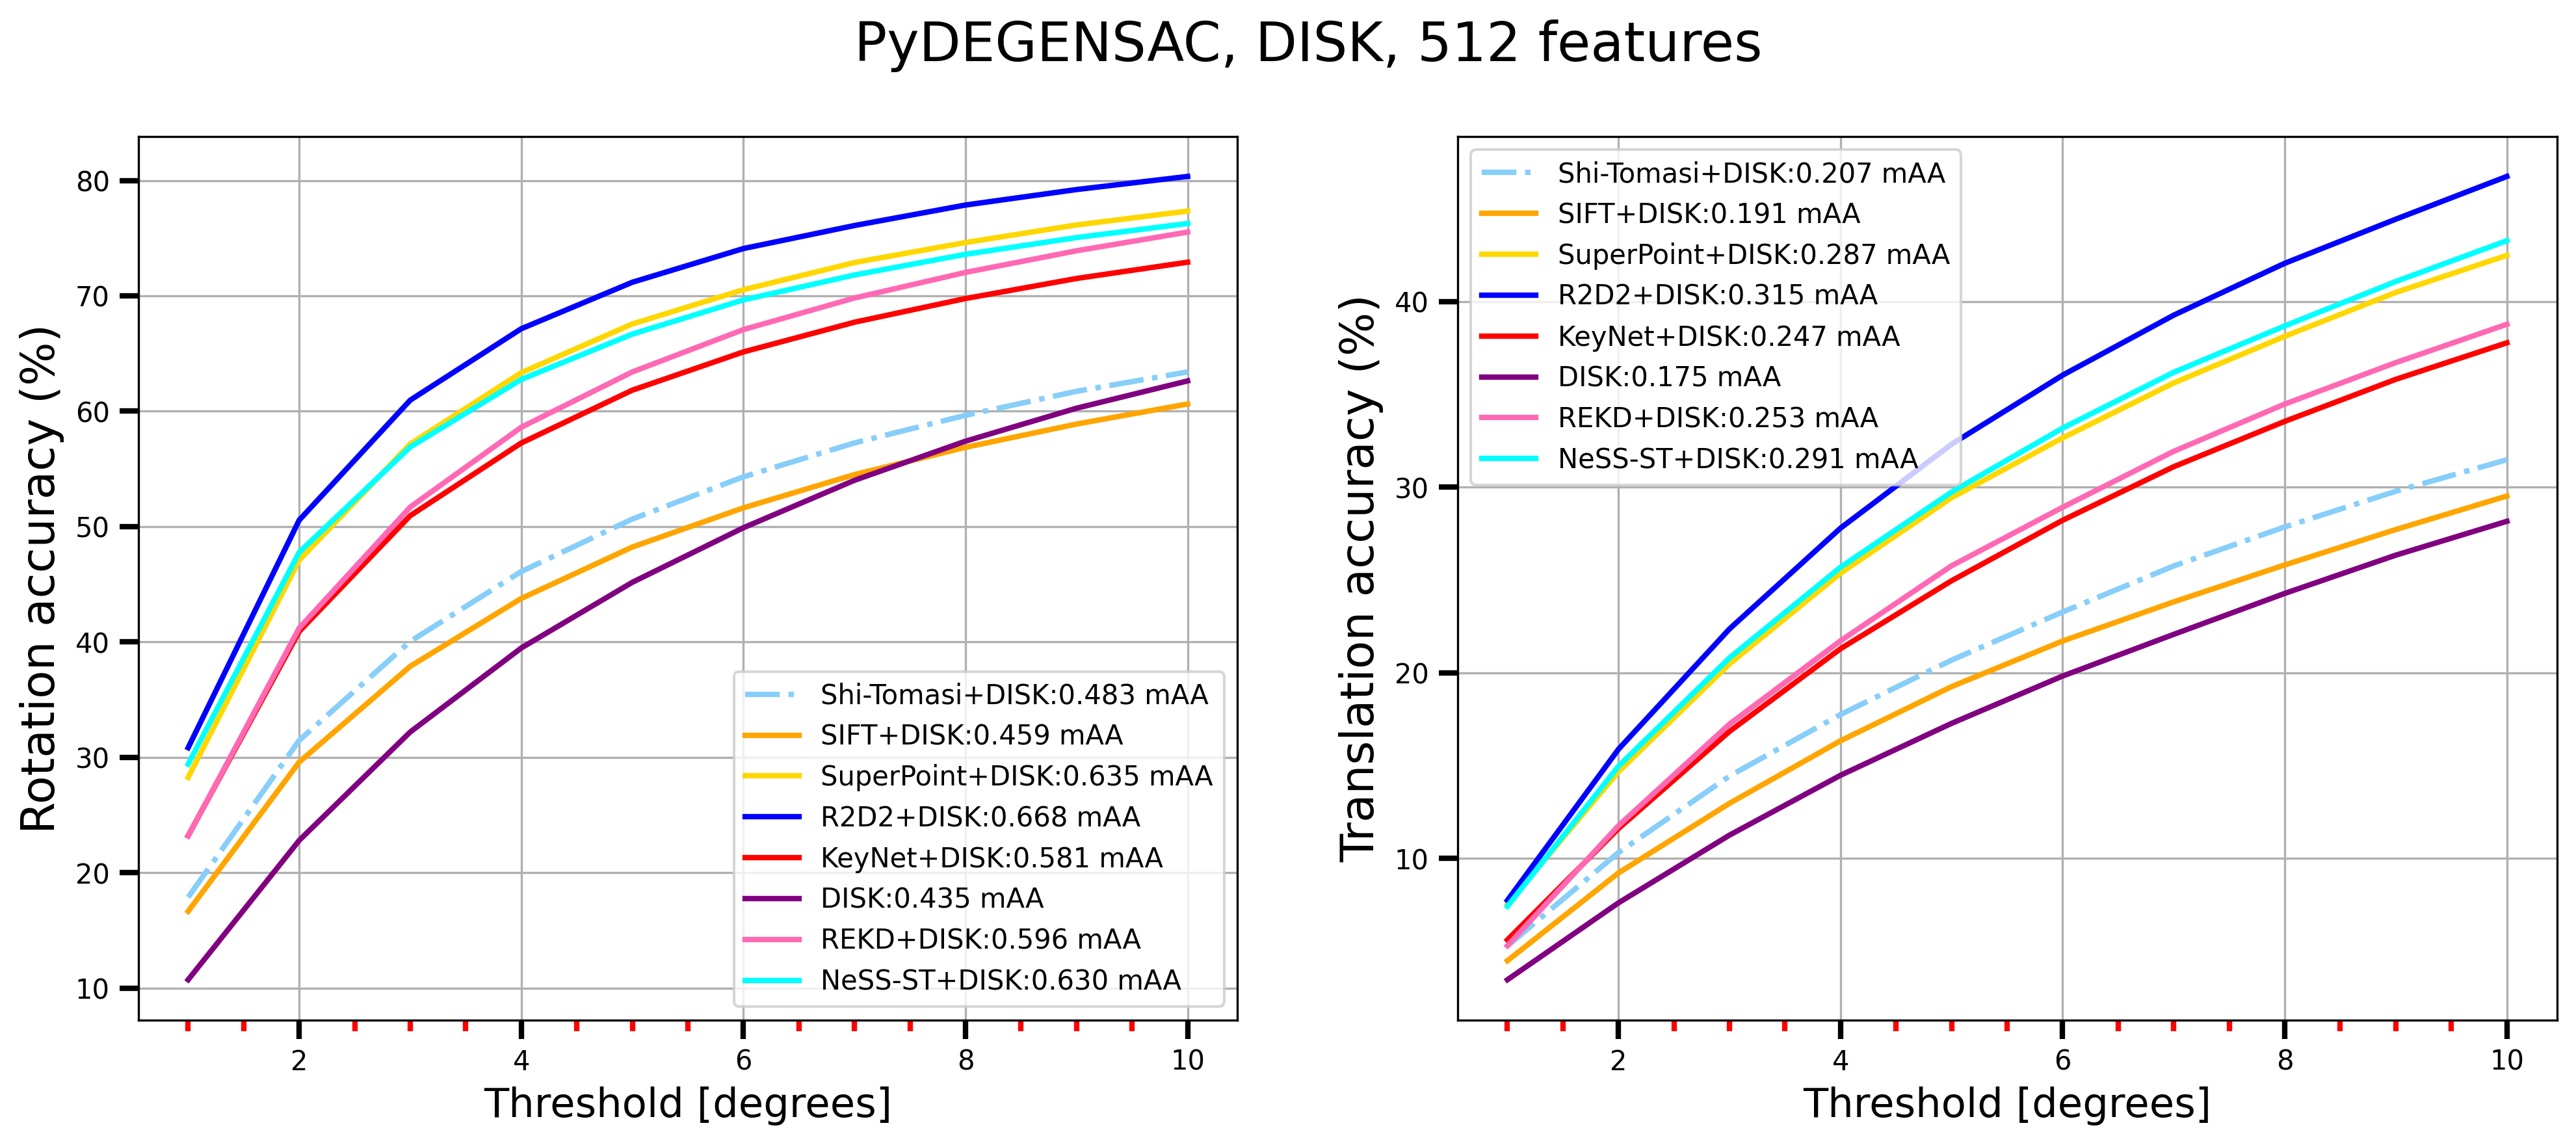

In [42]:
from source.evaluation.rel_pose.vis import RelPoseAccuracyPlotter

vis_indices = None

RelPoseAccuracyPlotter(methods_list,
                       r_acc_list, t_acc_list,
                       vis_indices).plot_all(save)

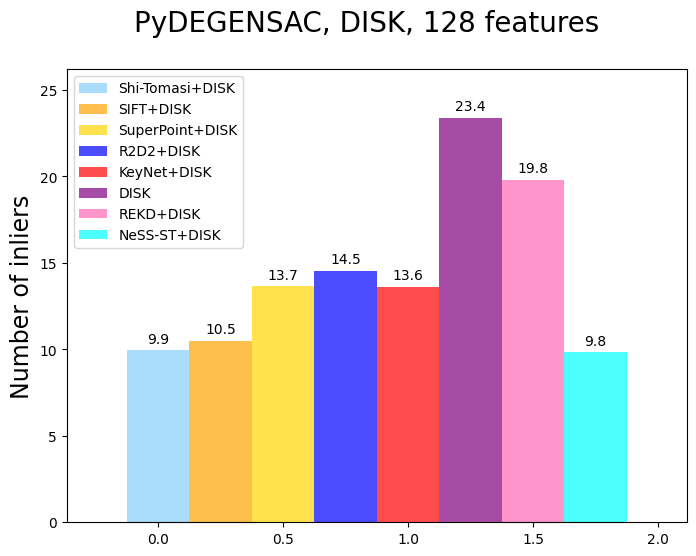

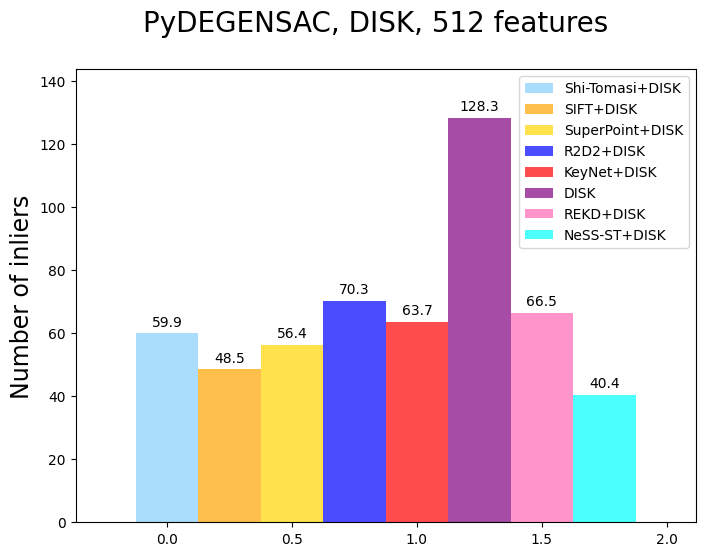

In [43]:
from source.evaluation.rel_pose.vis import RelPoseNumInlPlotter

RelPoseNumInlPlotter(methods_list,
                     num_inl_list,
                     vis_indices).plot_all(save)